<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393/578 Máquinas de Aprendizaje - 2019-1 </h1>

<H2 align='center'> Tarea 1 </H2>
<H3 align='center'> Diego Wilhelm - Tomás Ochoa </H3>
<hr style="height:2px;border:none"/>

<a id="primero"></a>
## 1. Aprendizaje con regresión lineal.

 #### 1.a Modulos y carga de datos

En esta primera parte de la tarea, trabajaremos con un dataset de Kaggle llamado "Black Friday", el cual contiene alrededor de medio millón de registros. Este dataset contiene diversas informaciones sobres los consumidores (edad, ocupación, género, entre otros) y el valor de la compra que realizaron al momento de la medición.Este dataset se encuentra disponible para su descarga en https://www.kaggle.com/mehdidag/black-friday. Este dataset fue pensado para intentar de predecir el valor de compra de un cliente en funcion de sus caracteristicas, sin embargo uno puede realizar distintas regresiones y tratar, por ejemplo, de predecir el rango de edad de un cliente basado en sus otras caracteristicas incluyendo el valor de su compra. En esta primera parte utilizaremos el set de datos para hacer regresión lineal sobre el valor de compra, es decir la variable a predecir es el valor de compra.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import scipy.stats as stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv("black-friday/BlackFriday.csv")
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
cols = list(data.columns.values)
col0 = cols[1]
del cols[1]

print ("Unique values\tMin\tMax\t\tColumn")
for col in cols:
    print(str(data[col].nunique())+"\t\t"+ str(data[col].min()) +"\t"+ str(data[col].max())+"\t" +"\t"+col)
    
print(str(data[col0].nunique())+"\t\t"+ str(data[col0].min()) +"\t"+ str(data[col0].max())+"\t" +col0)

Unique values	Min	Max		Column
5891		1000001	1006040		User_ID
2		F	M		Gender
7		0-17	55+		Age
21		0	20		Occupation
3		A	C		City_Category
5		0	4+		Stay_In_Current_City_Years
2		0	1		Marital_Status
18		1	18		Product_Category_1
17		2.0	18.0		Product_Category_2
15		3.0	18.0		Product_Category_3
17959		185	23961		Purchase
3623		P00000142	P0099942	Product_ID


El dataset de _Black Friday_ contiene aproximadamente 538 mil filas, correspondientes a una transacción cada una.
Las siguientes 12 columnas son los distintos datos que se tienen:

- **User ID:** Identificador del comprador. El dato es un número entero, Hay 5891 valores distintos y sus valores van desde el 1000001 al 1006040.
- **Product ID:** Identificador del producto. Es un string compuesto por una letra 'P' al comienzo, seguido de 8 digitos. Hay 3623 valores diferentes.
- **Gender:** El sexo de la persona que realizó la compra. Valor binario con valores posibles M o F.
- **Age:** Rango de edad al cual pertenece el usuario. Rangos posibles son 0-17, 18-25, 26-35, 36-45, 46-50, 51-55, 55+.
- **Occupation:** Ocupación del comprador. Dato guardado como número entero, sus valores posibles van del 0 al 20.
- **City category:** Categoría de la ciudad de residencia del comprador. Dato guardado como un string, valores posibles A, B o C.
- **Stay in current city years:** Cantidad de años de estadía en la ciudad del comprador. String, Posibles valores 0,1,2,3,4+.
- **Marital status:** Estado Civil. Valores binarios 0 o 1.
- **Product category 1:** Categoría principal del producto, Número entero, Valores posibles desde 1 a 18.
- **Product category 2:** Categoría secundaria del producto, es un valor opcional ya que podría haberse comprado solo 1 producto o solo 1 tipo de producto. Número entero, Valores en el dataset desde 2 a 18.
- **Product category 3:** Categoría terciaria del producto, es un valor opcional ya que podría haberse comprado solo 1 producto o solo 1 tipo de producto. Número entero, Valores en el dataset van desde 3 a 18.
- **Purchase:** Costo total de la compra en dolares. Valor entero, en el dataset hay valores desde 185 hasta 23961.

In [4]:
names = ["Product_Category_1", "Product_Category_2", "Product_Category_3"]
missing =  [data["Product_Category_1"].isna().sum(), data["Product_Category_2"].isna().sum(), data["Product_Category_3"].isna().sum()]
count = count = data["User_ID"].count()

print("Column\t\t\tMissing values\tPercentage")
for i in range(len(names)):
    print(str(names[i]) + "\t" + str(missing[i]) + "\t\t" + str(100*missing[i]/count))

Column			Missing values	Percentage
Product_Category_1	0		0.0
Product_Category_2	166986		31.06271287648095
Product_Category_3	373299		69.44102891306734


*Comentario: Respecto a las columnas "Product Category 2" y "Product Category 3" podemos observar que existe una gran cantidad de transacciones que no poseen esta característica, $31\%$ para "Product Category 2" y $69\%$ para "Product Category 3"
Por otro lado "Product Category 1" es una característica que todos los registros poseen, por lo que podemos concluir que las categorías 2 y 3 son opcionales y secundarias, y que para nuestros motivos sería problemático el utilizar estas categorías cuando son inexistentes en una cantidad importante de registros del dataset, por lo que estas se descartaran y se utilizará solo la categoría principal del producto.*

In [5]:
F_count = data.groupby("Gender").User_ID.nunique().F
M_count = data.groupby("Gender").User_ID.nunique().M
people_count = data["User_ID"].nunique()

print("Gender\tTotal\tPercentage")
print("F\t" + str(F_count) + "\t" + str((100*F_count)/people_count))
print("M\t" + str(M_count) + "\t" + str((100*M_count)/people_count))

Gender	Total	Percentage
F	1666	28.28042777117637
M	4225	71.71957222882362


*Comentario: Respecto al sexo de los compradores, podemos ver que la gran mayoría ($\approx72\%$) de los compradores son hombres, y tan solo el $\approx28\%$ son muejeres.*

In [6]:
ages = data.groupby("Age")
print("Range\tTransactions\tSpent\t\tPercentage of total spent")
total_spent = data["Purchase"].sum()

for ranges in ages:
    print(str(ranges[0]) + "\t" + str(ages.get_group(ranges[0]).Purchase.count()) + "\t\t" + str(ages.get_group(ranges[0]).Purchase.sum()) + "\t" + str((100*ages.get_group(ranges[0]).Purchase.sum())/total_spent))

Range	Transactions	Spent		Percentage of total spent
0-17	14707		132659006	2.6438376553867986
18-25	97634		901669280	17.96988585282708
26-35	214690		1999749106	39.854150480886965
36-45	107499		1010649565	20.14181665395026
46-50	44526		413418223	8.239249624639104
51-55	37618		361908356	7.212679849206248
55+	20903		197614842	3.938379883103546


*Comentario: Se puede observar que los compradores que más aportan al total de ingresos son los rangos 18-25, 26-35, 36-45 siendo más del $75\%$ del total entre los 3 rangos, del mismo modo, estos 3 rangos son los que realizan más cantidad de compras.*

In [7]:
categories = data.groupby("Product_Category_1")
total_spent = data["Purchase"].sum()
total_purchases = data["Purchase"].count()

print("Category\tItems purchased\tTotal spent\tPercentage of total purchases")
for category in categories:
    count = categories.get_group(category[0]).Purchase.count()
    spent = categories.get_group(category[0]).Purchase.sum()
    percentage = 100*count/total_purchases
    if (percentage >= 5):
        print(str(category[0]) + "\t\t" + str(count) + "\t\t0" + str(spent) + "\t" + str(percentage))

Category	Items purchased	Total spent	Percentage of total purchases
1		138353		01882666325	25.73640613344693
5		148592		0926917497	27.641063512761892
8		112132		0840693394	20.8587793004537


*Comentario: Observando las categorías principales de los productos, nos damos cuenta de que son 3 de estas categorías (1,5 y 8) las que incluyen más del $70\%$ de las ventas totales, con cada una de estas teniendo un al menos $20\%$ del total de cantidad de ventas mientras que el resto de las categorías no alcanzan el $5\%$ del total de cantidad de ventas por sí solas.*

 #### 1.b Columnas descartadas
 
De lo que vimos anteriormente, sabemos que "City_Category" tiene solo 3 posibles valores, estos no son valores numéricos. Otros datos no numéricos incluidos en el dataset son: Product_ID, Gender, Age, Stay_in_current_city_years.
Para trabajar estos datos no numéricos en la regresión lineal es necesario hacer un encoding de los valores de cada columna a valores numéricos.

Por otra parte los datos de categoría del producto son numéricos, pero tanto la categoria 2 como la categoria 3 tienen el gran problema de tener muchos datos faltantes, categoría 1 está completa.
Además de esto, se presenta el hecho de que los valores asignados a estas categorías no necesariamente se relacionan con la categoría que tienen asociada, es decir, el valor numérico no tiene sentido en la recta numérica y solo sirve como un "tag".

In [8]:
data.dtypes
data = data.drop(columns=['User_ID','Product_ID','Product_Category_1','Product_Category_2','Product_Category_3'])

 #### 1.c  Datos Categoricos

In [9]:
data['Gender'] = data.Gender.apply(lambda x: {'F':1,'M':0}[x])

city_cat_dic = {'A':-1, 'C':0, 'B':1}
data["City_Category"] = data.City_Category.apply(lambda x: city_cat_dic[x])

age_dic = {"0-17" : (17)/2.0, "18-25" : (18+25)/2.0, "26-35" : (26+35)/2.0, "36-45" : (36+45)/2.0, "46-50" : (46+50)/2.0, "51-55" : (51+55)/2.0, "55+" : 55}
data["Age"] = data.Age.apply(lambda x: age_dic[x])

Stay_In_Current_City_Years_dic = {"0": 0, "1": 1, "2": 2, "3": 3, "4+": 5}
data["Stay_In_Current_City_Years"] = data.Stay_In_Current_City_Years.apply(lambda x: Stay_In_Current_City_Years_dic[x])

data_pre = pd.get_dummies(data.Occupation)
col = list(data.columns)
col.remove('Occupation')
data_pre[col] = data[col]

*Comentario: La elección de etiquetar las ciudades A, C y B según los valores numéricos -1, 0 y 1 respectivamente es problemática, pues proyectando estas tres ciudades en la recta numérica implicará que la ciudad A y B cuentan con características lejanas ya que su distancia es de valor 2, sin embargo la ciudad C se encuentra entremedio de A y B, lo cual significará que esta ciudad se encuentra igualmente cercana en características a ambas ciudades, pues su distancia con ambas es de valor 1. La elección de estos valores implica llevar valores categóricos a numéricos bajo suposiciones que no son necesariamente correctas. La veracidad de la suposición realizada tendrá efectos directos en qué tan bien se realizará la regresión lineal, por ejemplo si tenemos tres categorías que dividen niveles socioeconómicos según: clase alta, media y baja, una asignación natural serían los valores 1, 0 y -1 ó bien -1, 0 y 1 respectivamente, bajo la suposición de que la clase media se encuentra entre la clase alta y baja, y que el nivel socioeconómico se relaciona con la cantidad de dinero que posee cada clase socioeconómica en promedio, siendo natural la transición categórica a numérica resultando en un mejor rendimiento la regresión lineal que se pudiese aplicar en comparación con distintas asignaciones. Este no es el caso de las ciudades, pues la transición categórica a numérica no resulta natural, pudiendo tornarse problemática.*

*Problema semejante se presenta para la característica "Occupation", el cual también es un valor categórico que no tiene sentido dentro de la recta numérica. Se puede trabajar al eliminar la columna y en su lugar agregar n columnas con valores binarios, en donde cada columna representa si pertenece o no a la categoría, para cada registro debería haber solo una de estas columnas con valor 1, y el resto debiesen ser 0. El método get_dummies hace esta conversión para nosotros, luego de obtener este encoding se junta con el resto de las columnas del dataset.*

*Para el caso de categorías binarias este no es problema, pues la distancia entre ambas categorías es de valor 1 siempre, siendo el único supuesto utilizado el diferenciar hombres y mujeres (dado este caso), añadir una nueva opción sería problemático, al igual que el caso de las ciudades, pues los valores asignado a la nueva categoría, o bien reasignación de valores, debiese ser llevada a cabo según supocisiones.*

*Se transforman las característica edad del comprador al valor numérico intermedio del rango de edad, mientras que para años de estadía del comprador en la ciudad se transforma el valor 4+ (4 años o más) al número 5, arbitrariamente.*

 #### 1.d  Separación de datos

Se separa el dataset en los subconjuntos de entrenamiento, validación y test, a continuación se imprimen las proporciones utilizadas.

In [10]:
data_pre=data_pre.astype(float)
data_pre_train, data_pre_temp = train_test_split(data_pre, test_size= 0.25)
data_pre_val, data_pre_test = train_test_split(data_pre_temp, test_size= 0.4)

print("Training set proportion: ", round(100*data_pre_train[0].count()/data_pre[0].count()), "percent of data")
print("Validation set proportion: ", round(100*data_pre_val[0].count()/data_pre[0].count()), "percent of data")
print("Testing set proportion: ", round(100*data_pre_test[0].count()/data_pre[0].count()), "percent of data")

data_y_train = data_pre_train["Purchase"]
data_x_train = data_pre_train.drop(columns='Purchase')

data_y_val = data_pre_val["Purchase"]
data_x_val = data_pre_val.drop(columns="Purchase")

data_y_test = data_pre_test["Purchase"]
data_x_test = data_pre_test.drop(columns="Purchase")

Training set proportion:  75.0 percent of data
Validation set proportion:  15.0 percent of data
Testing set proportion:  10.0 percent of data


 #### 1.e  Estandarización
 Utilizaremos `Standar_Scaler` para estandarizar los datos antes de entrenar. Inicialmente se visualizan las distribuciones de cada atributo del dataset, exceptuando las ocupaciones 1 a 18, con el fin de ahorrar espacio.

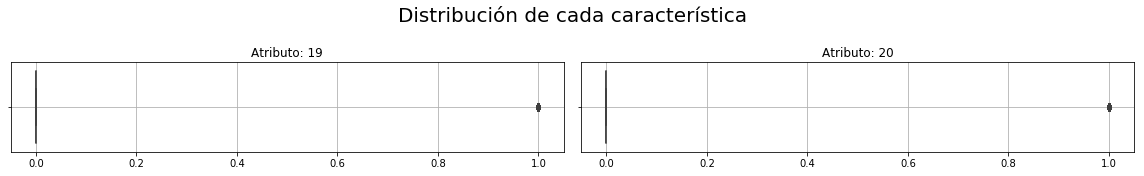

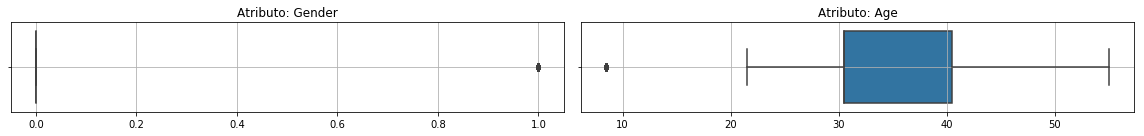

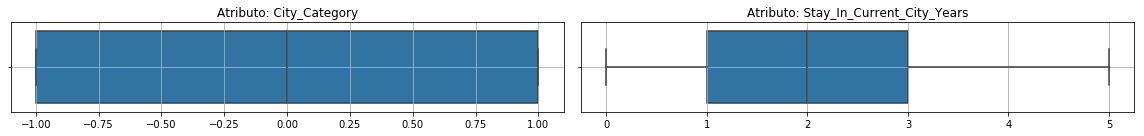

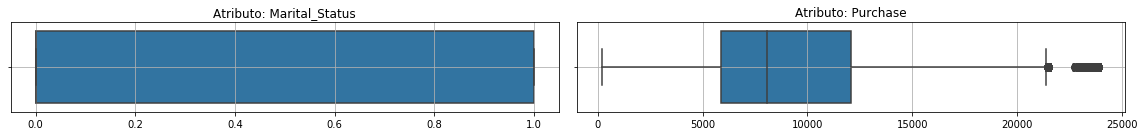

In [11]:
plt.rcParams['figure.figsize']=[16,2]
import seaborn as sns
k=1
plt.suptitle('Distribución de cada característica',size=20,y=1.2)
for i in data_pre.columns[19:]:
    plt.subplot(1,2,k)
    plt.title('Atributo: '+str(i))
    sns.boxplot(list(data_pre[i]))
    plt.tight_layout()
    plt.grid()
    if k==2:
        k=1
        plt.show()
    else:
        k=2

*Comentario: Dada la naturaleza binaria de las columnas asociadas a cada ocupación y género se opta por no estandarizar estos datos, en cambio se resta 0.5 a estas columnas con el fin de que se distribuyan en el espacio {-0.5,0.5} en lugar de {0,1}.*

Se procede a estandarizar realizando el 'fit' sobre los datos de train.

In [12]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()
scaler_x.fit(data_x_train.values[:,21:-1])
scaler_y.fit(data_y_train.values.reshape(-1,1))

x_tr1=scaler_x.transform(data_x_train.values[:,21:-1])
x_val1=scaler_x.transform(data_x_val.values[:,21:-1])
x_test1=scaler_x.transform(data_x_test.values[:,21:-1])
y_tr=scaler_y.transform(data_y_train.values.reshape(-1,1))
y_val=scaler_y.transform(data_y_val.values.reshape(-1,1))
y_test=scaler_y.transform(data_y_test.values.reshape(-1,1))

x_tr=np.concatenate([data_x_train.values[:,:22]-0.5,x_tr1-0.5],axis=-1)
x_val=np.concatenate([data_x_val.values[:,:22]-0.5,x_val1-0.5],axis=-1)
x_test=np.concatenate([data_x_test.values[:,:22]-0.5,x_test1-0.5],axis=-1)
pd.DataFrame(x_tr).describe()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
count,403182.000000,403182.000000,403182.000000,403182.000000,403182.000000,403182.000000,403182.000000,403182.000000,403182.000000,403182.000000,...,403182.000000,403182.000000,403182.000000,403182.000000,403182.000000,403182.000000,403182.000000,403182.000000,403182.000000,403182.000000
mean,-0.373387,-0.414106,-0.452200,-0.467764,-0.367812,-0.477816,-0.463347,-0.392684,-0.497163,-0.488583,...,-0.453877,-0.427266,-0.487782,-0.484491,-0.438859,-0.254280,-0.500000,-0.500000,-0.500000,-0.500000
std,0.332539,0.280208,0.213343,0.176627,0.338696,0.147280,0.187910,0.309515,0.053192,0.106237,...,0.209752,0.259700,0.109857,0.123566,0.239589,0.430514,1.000001,1.000001,1.000001,1.000001
min,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,...,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,-1.070761,-2.867625,-1.911853,-1.783918
25%,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,...,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,-1.070761,-0.843083,-1.911853,-1.145522
50%,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,...,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,-1.070761,-0.843083,-0.687184,-0.507125
75%,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,...,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,-1.070761,0.077163,0.537486,0.131271
max,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,1.252047,1.411520,0.537486,1.408065


*Comentario: Se aprecia que exitosamente, las columnas sometidas a estandarización cuentan con media aproximadamente cero y desviación estandar unitaria.*

*La ventaja de tener el objeto Standard_Scaler por sobre realizar la estandarización manualmente es que ahorra el trabajo de tener que estimar los parámetros de media y varianza. Adicionalmente el contar con la transformación inversa permite obtener desde la salida de la regresión lineal directamente el valor del precio de la compra mediante una línea de código si es que se realizase la estandarización del target.*

*Es posible desestandarizar los datos de salida del conjunto de entrenamiento recuperando sus valores originales con el siguiente procedimiento:*

In [13]:
y_orig_tr=scaler_y.inverse_transform(y_tr)
pd.DataFrame(y_orig_tr).describe()

,0
count,403182.000000
mean,9334.289633
std,4978.723238
min,185.000000
25%,5868.000000
50%,8062.000000
75%,12074.000000
max,23961.000000


A continuación se visualiza la nueva distribución de cada atributo luego de estandarizar

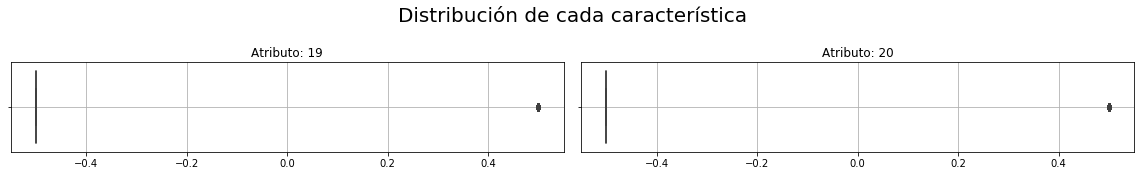

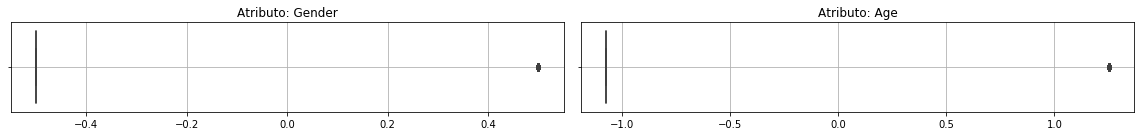

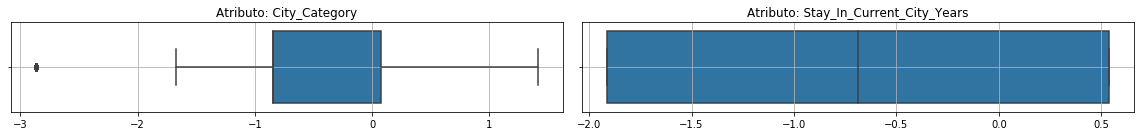

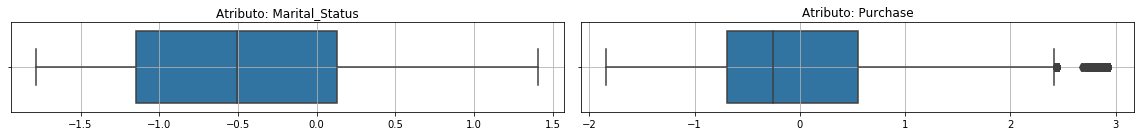

In [14]:
plt.rcParams['figure.figsize']=[16,2]
xy_data=np.concatenate([x_tr,y_tr],axis=-1)
import seaborn as sns
k=1
plt.suptitle('Distribución de cada característica',size=20,y=1.2)
for i in np.linspace(19,25,7):
    plt.subplot(1,2,k)
    plt.title('Atributo: '+str(data_pre.columns[int(i)]))
    sns.boxplot(list(xy_data[:,int(i)]))
    plt.tight_layout()
    plt.grid()
    if k==2:
        k=1
        plt.show()
    else:
        k=2
plt.subplot(1,2,2)
plt.title('Atributo: Purchase')
sns.boxplot(list(y_tr[:,0]))
plt.tight_layout()
plt.grid()
plt.show()

*Comentario: Se aprecia que se han contraído los extremos y centralizado los valores numéricos de cada característica estandarizada. Por último comentar que la estandarización ha provocado que números enteros (int) se hayan tornado en decimales (float)*

 #### 1.f Primera Regresión

Se procede a realizar dos regresiones lineales utilizando los datos escalados y no escalados respectivamente, evaluando tanto el score como el MSE.

In [15]:
reg_scaled = LinearRegression()
reg_scaled.fit(x_tr, y_tr)
scaled_predictions = reg_scaled.predict(x_test)
s1 = reg_scaled.score(x_test, y_test)

reg_unscaled = LinearRegression()
reg_unscaled.fit(data_x_train, data_y_train.values.reshape(-1,1))
s2 = reg_unscaled.score(data_x_test, data_y_test.values.reshape(-1,1))
unscaled_predictions = reg_unscaled.predict(data_x_test)


print("Score for scaled regression is:", s1)
print("Mean squared error for scaled regression is:", mean_squared_error(y_test, scaled_predictions))

print("\nScore for unscaled regression is:", s2)
print("Mean squared error for unscaled regression is:", mean_squared_error(data_y_test, unscaled_predictions))

Score for scaled regression is: 0.006781606133396068
Mean squared error for scaled regression is: 0.9938842330162999

Score for unscaled regression is: 0.006783048057814711
Mean squared error for unscaled regression is: 24635992.503900196


*Comentario: La comparación del score del modelo debiese hacerse sobre los datos de test, ya que los datos de train y validation están involucrados en el entrenamiento del modelo (aunque en este caso no fue necesario utilizar datos de validación), nos interesa conocer cómo el modelo se comportará sobre datos que no conoce, es decir la capacidad de generalización del modelo, el utilizar datos que no estuvieron involucrados en el entrenamiento nos permite entender el desempeño de nuestro modelo en la predicción de datos no conocidos por el modelo.*

*El valor del score entregado corresponde al coeficiente $R^2$ el cual es definido como $(1 - u/v)$, con $u = \sum(y_{true} - y_{pred}) ^2$ y $v = \sum(y_{true} - \overline{y_{true}})^2$.
El valor óptimo de este score es $1.0$, si el modelo es lo suficientemente malo el score puede ser negativo. Un modelo que entrege un valor igual a cero es un modelo que predice siempre el valor esperado de $y$ independiente de la entrada, pese a que resulte un valor pequeño el hecho que sea distinto de cero significa que se está realizando una predicción en base a la entrada distinta al valor esperado.*

*Comentario: Según lo obtenido la predicción es bastante mala, pues los scores son bajos para ambos casos, obteniéndose un valor levemente mejor para el caso con valores escalados sobre el caso sin escalar.*

Se muestra a continuación la correlación entre características, previo a estandarizarización

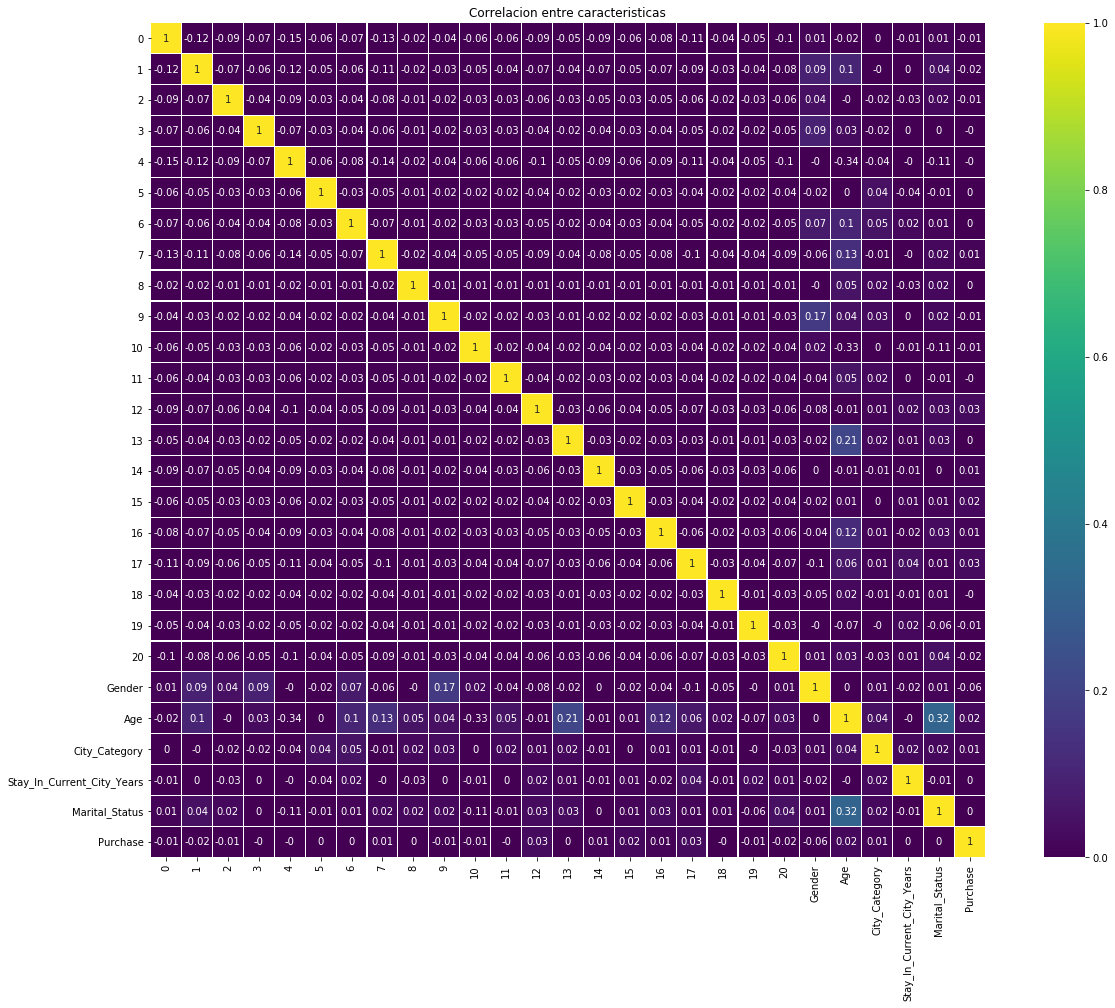

In [16]:
plt.figure(figsize=(18,14))
sns.heatmap(np.around(data_pre.corr(),decimals=2), vmax=1,vmin=0, linewidths=0.1,
            square=True,annot=True,cmap='viridis',linecolor="white")
sns.set(font_scale=1)
plt.tight_layout()
plt.title('Correlacion entre caracteristicas');
plt.show()

*Comentario: Es posible apreciar que la matriz de correlación resulta en valores cercanos a cero (en el mejor de los casos aproximadamente 0.06), lo cual resulta desalentador frente al objetivo de realizar una regresión lineal sobre las características para predecir el precio de la compra.*

#### 1.g  Tranformaciones simples
Se grafican los precios ordenados de menor a mayor a lo largo del dataset de entrenamiento, superponiendo sobre esta curva una recta que une el origen con el mayor precio.

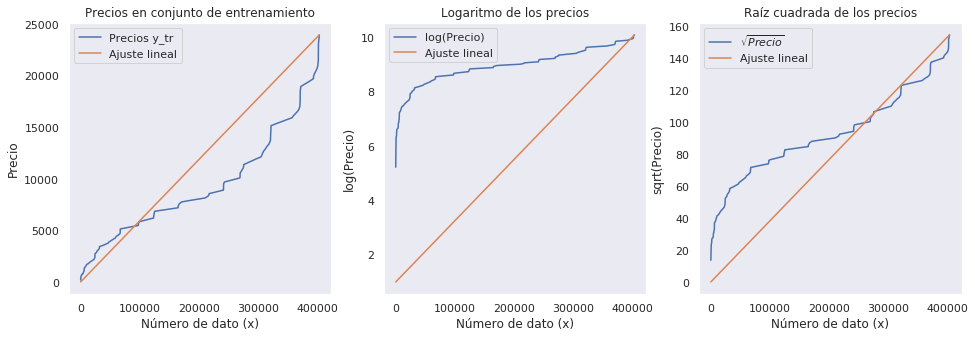

In [17]:
# Gráfico de comparación entre una recta y los valores a predecir del dataset
plt.rcParams["figure.figsize"] = [16,5]
plt.subplot(1,3,1)
plt.title("Precios en conjunto de entrenamiento")
plt.xlabel("Número de dato (x)")
plt.ylabel("Precio")
plt.grid()
plt.plot(np.arange(0,data_y_train.shape[0],1),data_y_train.sort_values(),label='Precios y_tr')
plt.plot(np.arange(0,data_y_train.shape[0],1),np.linspace(0,((data_y_train.sort_values())).max(),num=data_y_train.shape[0]),label='Ajuste lineal')
plt.legend()
x_log = np.arange(0,data_y_train.shape[0],1)
y_log = np.log(data_y_train.sort_values())
y = np.linspace(1,y_log.max(),num=data_y_train.shape[0])

plt.subplot(1,3,2)
plt.title("Logaritmo de los precios")
plt.xlabel("Número de dato (x)")
plt.ylabel("log(Precio)")
plt.grid()
plt.plot(x_log, y_log,label='log(Precio)')
plt.plot(x_log, y,label='Ajuste lineal')
plt.legend()
x_sqrt = np.arange(0,data_y_train.shape[0],1)
y_sqrt = np.sqrt(data_y_train.sort_values())
y = np.linspace(0,y_sqrt.max(),num=data_y_train.shape[0])

plt.subplot(1,3,3)
plt.title("Raíz cuadrada de los precios")
plt.xlabel("Número de dato (x)")
plt.ylabel("sqrt(Precio)")
plt.grid()
plt.plot(x_sqrt, y_sqrt,label='$\sqrt{Precio}$')
plt.plot(x_sqrt, y,label='Ajuste lineal')
plt.legend()
plt.show()

*Comentario: Este método gráfico nos permite visualizar cómo se distribuyen los valores de precio en el dataset de entrenamiento, siendo posible visualizar cómo se concentran los datos, por ejemplo, en el primer caso (lineal) se ve que se cuenta con mayor cantidad de datos en los extremos, es decir, existen casos de compras de muy bajo precio junto con compras de alto precio (outliers), no existiendo un aumento continuo al ordenar los precios de menor a mayor. No contar con una distribución como la recta naranja no necesariamente dicta que no se pueda realizar una regresión lineal para calcular el precio en función del resto de los atributos, un argumento de mayor peso para saber si es factible o no realizar la regresión lineal es el cálculo de la correlación lineal entre los atributos.*

*En los gráficos de la derecha mostrando las transformaciones logarítmicas podemos observar que en el caso del logaritmo, un ajuste lineal no sería buena idea. Por su parte el ajuste de raíz cuadrada pareciera que podría ser aproximado de mejor manera con un ajuste lineal, pero no de manera muy buena.*

#### 1.h 10-_fold_ sobre la potencia
Probaremos la utilidad real de realizar una transformación del target del tipo $P \gets P^{i}$ con $i \in [0,2]$ haciendo 10-_fold_ variando el valor de $i$ en a lo menos 10 incrementos. Puede basarse en la estrucuta siguiente. Debe elegir un estimador del error de validación de cada modelo (_e.g._ mediana, promedio...) y comentar brevemente por qué eligio tal estimador. 
Luego grafique como varia el error de validación en función de _i_. 
Finalmente, con el mejor valor de $i$ encontrado, entrene un regresor lineal con todos los datos de entrenamiento y compare su densempeño con los modelos anteriores.
Puede afirmar que alguna de las transformaciones mejore el desempeño del modelo? 

In [18]:
folds = KFold(10)
xy_data=np.concatenate([xy_data,np.concatenate([x_val,y_val],axis=-1)])
errors = []
scores = []
validation_error = []
errors_indices = []

for i in range(1,21):
    
    errors_i = []
    scores_i = []

    for train_index, val_index in folds.split(xy_data):
        y_=scaler_y.inverse_transform(xy_data[:,-1])
        y_i = y_**(i/10.0)
        y_val_i = y_i[val_index]
        y_tr_i = y_i[train_index]
        x_=xy_data[:,:-1]
        x_val_i = x_[val_index]
        x_tr_i = x_[train_index]
        regression = LinearRegression()
        # entrene el modelo y guarde su score
        regression.fit(x_tr_i, y_tr_i.reshape(-1,1))
        
        # calcular error del modelo y guardar
        predictions = regression.predict(x_val_i)
        error_i = mean_squared_error(y_val_i, predictions)
        score_i = regression.score(x_val_i, y_val_i)
        errors_i.append(error_i)
        scores_i.append(score_i)
        
    # escoger estimador de error del modelo, media mediana o etc del error de los 10 folds
    errors_indices.append(errors_i)
    error = np.median(errors_i)
    score = np.median(scores_i)
    errors.append(error)
    scores.append(score)
        
     #  . . .

A continuación se grafica el error y score v/s i de manera separada

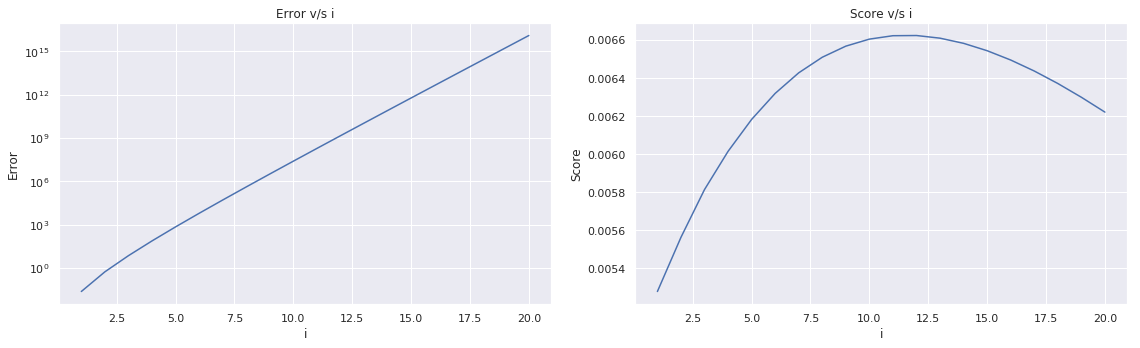

In [19]:
plt.rcParams["figure.figsize"]=[16,5]
plt.subplot(1,2,1)
plt.title('Error v/s i')
plt.xlabel('i')
plt.ylabel('Error')
plt.semilogy(np.arange(1,21), errors)
plt.subplot(1,2,2)
plt.title('Score v/s i')
plt.xlabel('i')
plt.ylabel('Score')
plt.plot(np.arange(1,21), scores)
plt.tight_layout()
plt.show()

*Comentario: El error aumenta a medida que se aumenta i, esto dado que al utilizar error MSE, este aumentará su valor si es que se trata con datos de mayor magnitud, por ejemplo si se predice un valor de 5 para una entrada de datos x_test que tiene por y_test un valor de 3 el MSE tendrá valor raíz de 2, mientras si se predice un valor de 500 mientras y_test vale 300 el valor MSE será de raíz de 200. Por esto una mejor manera de decirnir cuál modelo se comporta de mejor modo es por medio del empleo del score.*

Luego los valores de i donde se logra mejor error y score son los siguientes:

In [20]:
min_err = np.max(errors)
min_index = 0
for i in range(len(errors)):
    if (errors[i] < min_err):
        min_index = i
        min_err = errors[i]
        
min_index += 1
print("El valor de i con mejor error es:", str(min_index), "con un error de :", str(min_err))

        
max_score = np.min(scores)
best_index = 0
for i in range(len(scores)):
    if (scores[i] > max_score):
        best_index = i
        max_score = scores[i]
    
best_index += 1
print("El valor de i con mejor score es:", str(best_index), "con un score de :", str(max_score))

El valor de i con mejor error es: 1 con un error de : 0.02333913644737192
El valor de i con mejor score es: 12 con un score de : 0.00662332190376852


Luego se entrena el model utilizando i=11 (mejor score) sobre el conjunto de entrenamiento definido previamente. Obteniéndose el siguiente error y score:

In [21]:
new_y_train = scaler_y.inverse_transform(y_tr)**(best_index/10.0)
new_y_test = scaler_y.inverse_transform(y_test)**(best_index/10.0)
new_y_val = scaler_y.inverse_transform(y_val)**(best_index/10.0)

new_regression = LinearRegression()
new_regression.fit(x_tr, new_y_train)

new_score = new_regression.score(x_test, new_y_test)
new_predictions = new_regression.predict(x_val)
new_error = mean_squared_error(new_y_val, new_predictions)

validation_error = new_predictions - new_y_val

print('Score: ',new_score)
print('Error:',new_error)

err = validation_error.flatten()

Score:  0.006836315582170349
Error: 1428695983.5472155


*Comentario: Se aprecia que ha mejorado levemente el score obtenido en comparación con el ítem anterior*

#### 1.i _Q-Q plot_
Se grafica el _Quantile-Quantile Plot_ del residuo (error) de validación del mejor modelo que se ha encontrado.

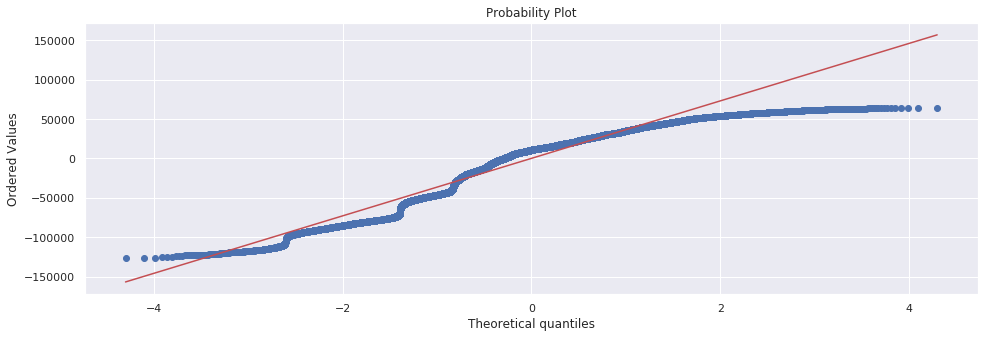

In [22]:
stats.probplot(err ,dist='norm', plot=plt)
plt.show()

La función stats.probplot genera un plot de la probabilidad de la data (error de validación) v/s los cuantiles de una distribución normal. Adicionalmente calcula la mejor línea de ajuste para la data.<br><br>
*Comentario: Luego si la distribución de puntos en el gráfico forman visiblemente una recta es un indicio de que el error de validación sigue una distribución normal (error=prediccion(xval)-yval). El hecho de que el error no se comporte de forma normal es indicio que éste no se comporta como ruido blanco, lo que es de esperar dado el bajo score obtenido.*

#### 1.j Variables categoricas
Se entrena ahora el modelo que mejor resultado obtuvo pero esta vez utilizando todos los atributos, transformando las variables categoricas no binarias. Como las variables categóricas no se relacionan linealmente al _target_ (pues no representan un valor numérico), son transformadas a variables binarias de igual manera que se realizó con la variable "Occupation" en la parte 1.c. 

Se carga nuevamente el dataset:

In [23]:
data = pd.read_csv("black-friday/BlackFriday.csv")

In [24]:
data = data.drop(columns=["User_ID","Product_ID"])

Se transforman las características Gender, City_category, age y stay_in_current_city como se hizo previamente

In [25]:
data['Gender'] = data.Gender.apply(lambda x: {'F':1,'M':0}[x])

city_cat_dic = {'A':-1, 'C':0, 'B':1}
data["City_Category"] = data.City_Category.apply(lambda x: city_cat_dic[x])

age_dic = {"0-17" : (17)/2.0, "18-25" : (18+25)/2.0, "26-35" : (26+35)/2.0, "36-45" : (36+45)/2.0, "46-50" : (46+50)/2.0, "51-55" : (51+55)/2.0, "55+" : 55}
data["Age"] = data.Age.apply(lambda x: age_dic[x])

Stay_In_Current_City_Years_dic = {"0": 0, "1": 1, "2": 2, "3": 3, "4+": 4}
data["Stay_In_Current_City_Years"] = data.Stay_In_Current_City_Years.apply(lambda x: Stay_In_Current_City_Years_dic[x])

Se transforma occupation mediante get dummies:

In [26]:
data_pre = pd.get_dummies(data.Occupation)
#print(data_pre.columns)

col = list(data.columns)
col.remove('Occupation')
data_pre[col] = data[col]
#print(data_pre.columns)

Se transforma product_category_1 mediante get dummies:

In [27]:
data_pre1 = pd.get_dummies(data_pre.Product_Category_1)
#print(data_pre1.columns)
#cambiar nombres de columns a 21 - 38
data_pre1.columns = range(21,39)

col1 = list(data_pre.columns)
col1.remove('Product_Category_1')
data_pre1[col1] = data_pre[col1]
#print(data_pre1.columns)

Se transforma product_category_2 mediante get dummies, se asumirá una valor 0 si es que no se cuenta con el dato:

In [28]:
data_pre2 = pd.get_dummies(data_pre1.Product_Category_2)
#print(data_pre2.columns)
# cambiar nombres de columnas a 39 - 55
data_pre2.columns = range(39,56)


col2 = list(data_pre1.columns)
col2.remove('Product_Category_2')
data_pre2[col2] = data_pre1[col2]
#print(data_pre2.columns)

Se transforma product_category_3 mediante get dummies, se asumirá una valor 0 si es que no se cuenta con el dato:

In [29]:
data_pre3 = pd.get_dummies(data_pre2.Product_Category_3)
#print(data_pre3.columns)
# cambiar nombres de columnas a 56 - 70
data_pre3.columns = range(56,71)


col3 = list(data_pre2.columns)
col3.remove('Product_Category_3')
data_pre3[col3] = data_pre2[col3]
#print(data_pre3.columns)

Se transforma City_category mediante get dummies, lo cual permite eliminar el supuesto de proximidad necesario cuando se representaron las 3 ciudades dentro de la recta numérica:

In [30]:
data_pre4 = pd.get_dummies(data_pre3.City_Category)
# cambiar nombres de columnas a 56 - 70
data_pre4.columns = range(71,74)


col4 = list(data_pre3.columns)
col4.remove('City_Category')
data_pre4[col4] = data_pre3[col4]
#print(data_pre3.columns)

Se transforma Stay_in_current_city mediante get dummies, con el fin de tratar de forma excepcional el caso 4+, el cual escapa de una representación numérica al abarcar un intervalo desde el 4 al infinito (arbitrariamente se asumió un valor de 5 en ítems previos):

In [31]:
data_pre5 = pd.get_dummies(data_pre4.Stay_In_Current_City_Years)
# cambiar nombres de columnas a 56 - 70
data_pre5.columns = range(74,79)


col5 = list(data_pre4.columns)
col5.remove('Stay_In_Current_City_Years')
data_pre5[col5] = data_pre4[col5]
#print(data_pre3.columns)

Se multiplica el target según el mejor valor de i obtenido en el ítem previo:

In [32]:
# transformar la variable target exponenciandola al best index / 10
data_pre5["target"] = data_pre5["Purchase"].values**(best_index/10.0)
data_pre5 = data_pre5.drop(columns="Purchase")
#data_pre3.columns

Se procede a separar el dataset en entrenamiento, validación y test

In [33]:
# separar la data en conjuntos de training, test

data_pre_train, data_pre_temp = train_test_split(data_pre5, test_size= 0.25)
data_pre_val, data_pre_test = train_test_split(data_pre_temp, test_size= 0.4)

print("Training set proportion: ", round(100*data_pre_train[0].count()/data_pre[0].count()), "percent of data")
print("Validation set proportion: ", round(100*data_pre_val[0].count()/data_pre[0].count()), "percent of data")
print("Testing set proportion: ", round(100*data_pre_test[0].count()/data_pre[0].count()), "percent of data")

data_y_train = data_pre_train["target"]
#data_x_train = data_pre_train.drop(columns='Purchase')
data_x_train = data_pre_train.drop(columns='target')


data_y_val = data_pre_val["target"]
#data_x_val = data_pre_val.drop(columns="Purchase")
data_x_val = data_pre_val.drop(columns="target")


data_y_test = data_pre_test["target"]
#data_x_test = data_pre_test.drop(columns="Purchase")
data_x_test = data_pre_test.drop(columns="target")

Training set proportion:  75.0 percent of data
Validation set proportion:  15.0 percent of data
Testing set proportion:  10.0 percent of data


Se estandarizan los datos de entrada (no los datos de salida!)

In [34]:
# estandarizacion de los datos
scaler_x = StandardScaler()
scaler_x.fit(data_x_train)
x_tr = scaler_x.transform(data_x_train)
x_val = scaler_x.transform(data_x_val)
x_test = scaler_x.transform(data_x_test)

/home/wil/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/wil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/home/wil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """
/home/wil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


Se realiza la regresión lineal:

In [35]:
# generar la regresión
model = LinearRegression()
model.fit(x_tr, data_y_train)

#evaluar score y error
score = model.score(x_test, data_y_test)
model_predictions = model.predict(x_val)

print("Score for the model is:", s1)
print("Mean squared error for the model is:", mean_squared_error(data_y_val, model_predictions))

Score for the model is: 0.006781606133396068
Mean squared error for the model is: 527329923.3461456


*Comentario: Se obtiene un score levemente inferior al mejor valor obtenido en el ítem previo, esto puede deberse a una decisión incorrecta que se haya tomados (p.ej añadir las categorías de producto 2 y 3, incluso 1), o bien al hecho de que se optó por estandarizar las columnas dummies de las características de entrada, práctica que se evitó previamente. El indiscriminado de pd.get_dummies llega a tener un costo, pues aumenta la dimensionalidad de la entrada, lo cual no es deseado.*

<a id="segundo"></a>
## 2. Selección de Atributos. 

En esta segunda parte de la tarea estudiaremos un _dataset_ llamado "House Sales in King County", un conjunto de datos de ventas de casas, con diversa información sobre las casas vendidas y los precios de venta. Por la naturaleza variada de las casas y las percepciones de las personas que las compran el problema de predecir el valor de una casa a ser vendida resulta interesante pues si bien muchos supuestos razonables se cumplen la mayoría de las veces, la percepción de los compradores puede cambiar mucho por caracteristicas dificiles de medir.

Sin embargo, resulta facil imaginar que algunos de los datos resultan más relevantes que otros al momento de predecir, por esto haremos selección de atributos en esta parte de la pregunta. Este _dataset_ es mucho más limpio que lo usual, por lo cual la exploración inicial será bastante corta. Luego de explorar los datos se deberá realizar una exploración de los distintos atributos para evaluar que tan relevantes son en la predicción del resultado. 

#### 2.a Carga de datos 
Se cargan los datos a un DataFrame, el cual se muestra su descripción a continuación

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
data = pd.read_csv("housesalesprediction/kc_house_data.csv")

Este dataframe cuenta con 21 atributos relacionados con cada venta, entre ellos se encuentran:
- id: Número identificador de la casa
- date: Fecha en que fue vendida
- price: Precio al cual fue vendida (Target)
- bedrooms: Número de piezas
- bathrooms: Número de baños
- sqft_living: Área utilizada por la casa
- sqft_lot: Área utilizada por el terreno
- floorsTotal: Pisos (niveles) de la casa
- waterfrontHouse: Vista al mar
- view: Veces que se han ido interesados a ver el hogar
- condition: Estado general del hogar
- gradeoverall: Grado otorgado al hogar, basado en un sistema propio de King County
- sqft_above: Área utilizada por la casa sin contar el sótano
- sqft_basement: Área utilizada por el sótano
- yr_built: Año de construcción
- yr_renovated: Año cuando la casa fue renovada
- zip: Código zip
- lat: Coordenada de latitud
- long: Coordenada de longitud
- sqft_living15: Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area
- sqft_lot15lotSize area in 2015(implies-- some renovations)

*Comentario: Debido a que el atributo id no presenta información relevante para el problema y zipcode posee números postales que tan solo pueden ser tratados de manera categórica por su naturaleza se procede a eliminarlos de la data (más adelante se volverá a incorporar el atributo zipcode)*

In [37]:
data=data.drop(columns=['id','zipcode'])

Se procede a verificar que todas las filas cuenten con información, a continuación

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(13), object(1)
memory usage: 3.1+ MB


Se procede a visualizar el encabezado de la data que se dispone

In [39]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


*Comentario: Se aprecia que la información de la fecha se encuentra codificada, incluyendo un string que no permite trabajar con esta variable de modo numérico, se aprecia que no basta escoger los primeros 8 dígitos entregados ya que se desea que el número que represente la fecha presente un incremento constante a medida que pasan los días, es decir, esto no se cumple con las fechas entregadas en el formato que vienen ya que cuando hay cambio de mes o año hay un brinco númerico que no calza con la evolución temporal que existe, p.ej en el cambio de año donde hay un aumento numérico lejano a la unidad (20141231->20150101).*

Se transforma la columna 'date' a valores numéricos que representan el ranking de la fecha de venta de más antiguo a más reciente respecto a la totalidad del dataset, obteniendo la fila respectiva a la venta más antigua el valor 0.

In [40]:
def to_num(date):
    nums = list(date)
    res = 0
    for i in range(8):
        res = res + int(nums[i])*(10**(7-i))
    return res
data['date'] = data.date.apply(to_num).rank()
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,10544.0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,13682.5,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,16699.0,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,13682.5,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,16276.0,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


*Comentario: Este método tiene la desventaja de que dos fechas que pueden resultar lejanas temporalmente tengan la misma diferencia numérica que dos fechas cercanas, es decir, si se tuviesen las siguientes fechas en el dataset: 20141201,20141205 y 20150302 y no hubiese fechas entremedio, este método las ordenaría de modo que la diferencia numérica entre estas fechas sería unitaria, lo que no concuerda con la diferencia temporal existente.*

#### 2.b Preprocesamiento de los datos y visualización

Se procede a analizar cada columna estadísticamente

In [41]:
data.describe()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10807.000000,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,6239.228357,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,34.000000,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,5431.000000,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10795.500000,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16198.000000,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21613.000000,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


*Comentario: Se aprecia una baja homogeneidad respecto a la desviación estandar y rango de valores*

Se procede a visualizar la distribución de cada columna a continuación

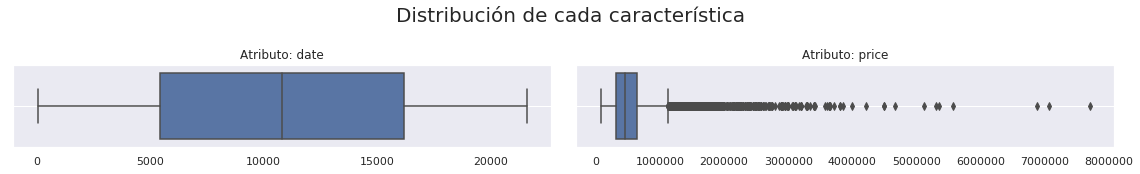

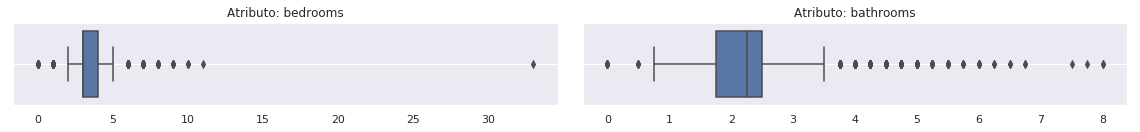

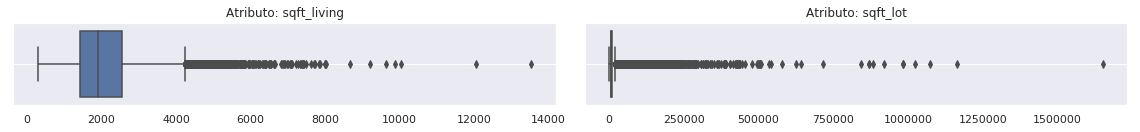

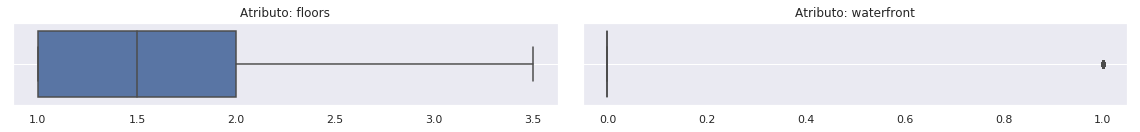

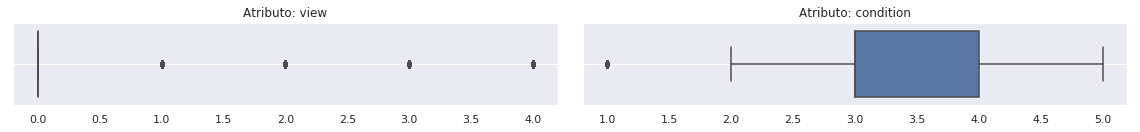

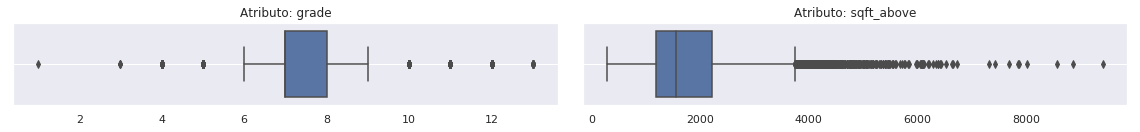

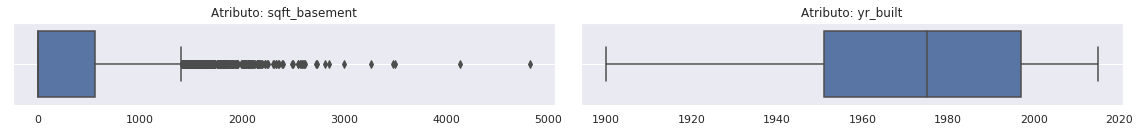

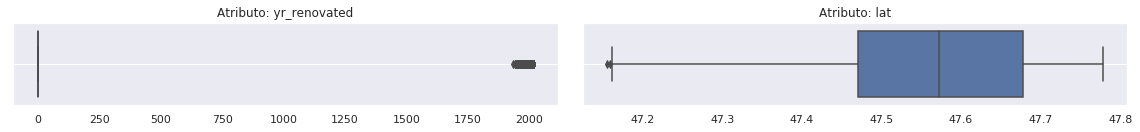

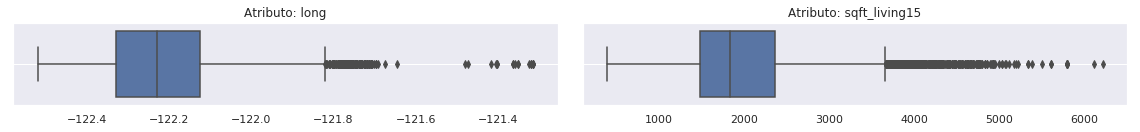

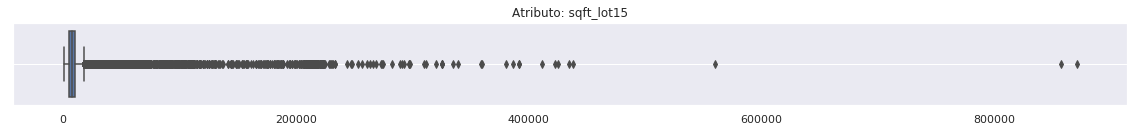

In [42]:
plt.rcParams['figure.figsize']=[16,2]
k=1
plt.suptitle('Distribución de cada característica',size=20,y=1.2)
for i in data.columns:
    plt.subplot(1,2,k)
    if i=='sqft_lot15':
        plt.subplot(1,1,1)
    plt.title('Atributo: '+i)
    sns.boxplot(list(data[i]))
    plt.tight_layout()
    plt.grid()
    if k==2:
        k=1
        plt.show()
    else:
        k=2

*Comentario: Se aprecia que gran cantidad de atributos no siguen una distribución normal, presentando varios una alta dispersión a valores elevados, frente a estos casos se realizará en lugar de una estandarización un ajuste logarítmico*

Se aprecia que hay un outlier entre el número de habitaciones, para evitar complicaciones se elimina directamente este valor ya que se considera dañino.

In [43]:
data=data.drop(np.argmax(data['bedrooms']))

/home/wil/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


Se procede a estandarizar los datos manualmente, realizando un ajuste logarítmico a los datos con distribución lejana a la normal y aplicando un estandarización manual para el resto de los datos. Existen tres casos especiales de los cuales dos son: 'waterfront' el cual posee clasificación binaria y 'yr_renovated' el cual posee un valor cero si es que no se ha renovado la casa o el año en que se remodeló si es que efectivamente se remodeló (1900+), es por esto que se ha optado por convertir 'yr_renovated' a calificación binaria simplemente, permitiéndonos perder la información respecto a la fecha de remodelación, para conservar tan solamente la información de si ha sido o no remodelada la casa. Adicionalmente se cuenta con un conjunto de casos especiales 'bedrooms','bathrooms','view' y 'grade', estos asumen valores enteros de manera discreta, es por esto que se opta por dividir tan solamente por el máximo valor que adoptan para acotar sus valores entre 0 y 1 tan solamente.

Se grafican las distribuciones obtenidas mostrando la distribución inicial y su transformación post-escalamiento (Se indica cuál se utilizó).

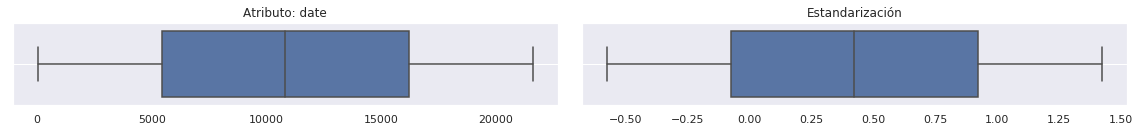

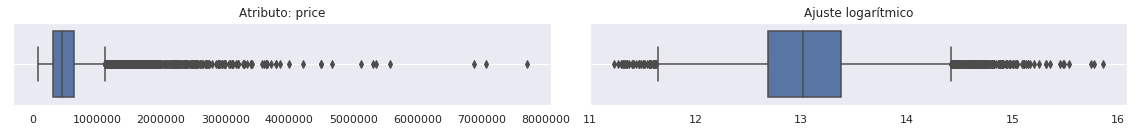

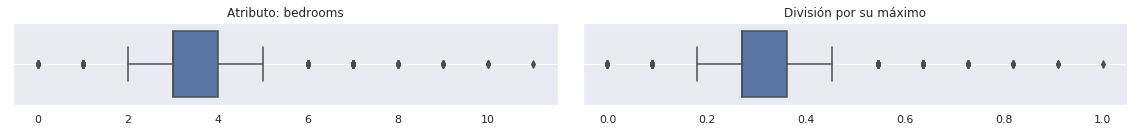

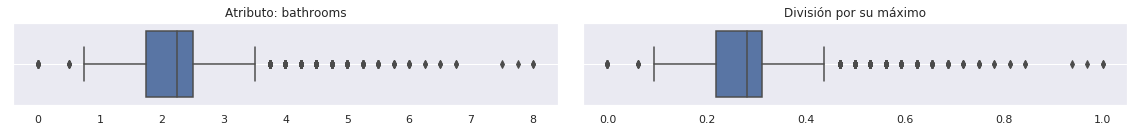

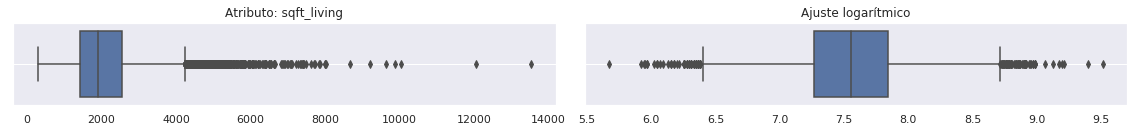

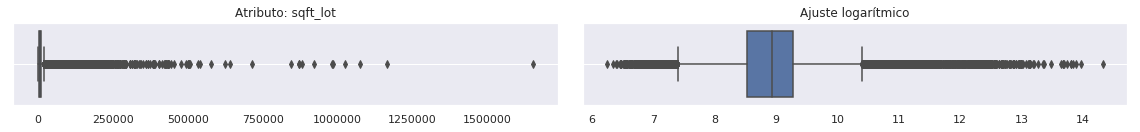

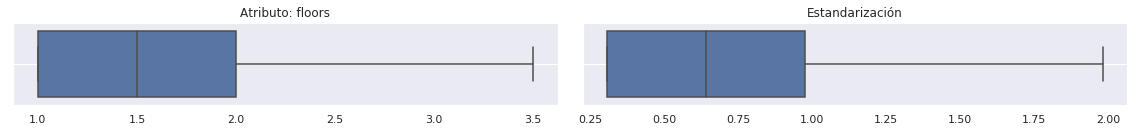

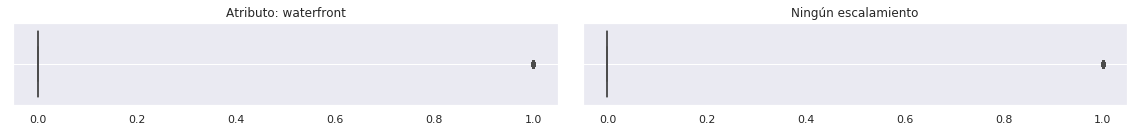

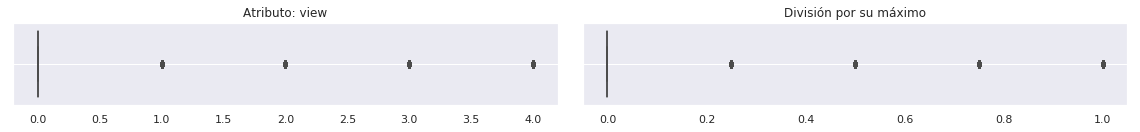

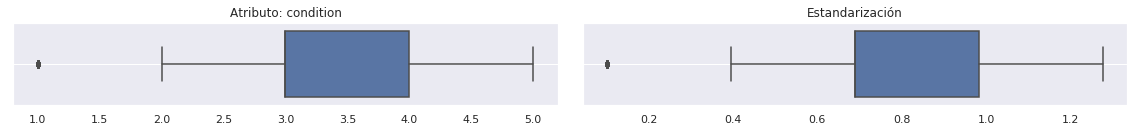

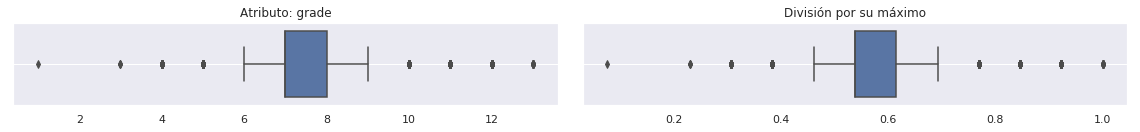

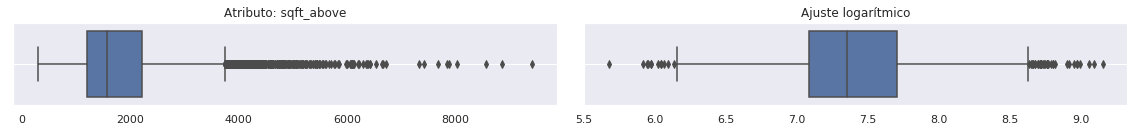

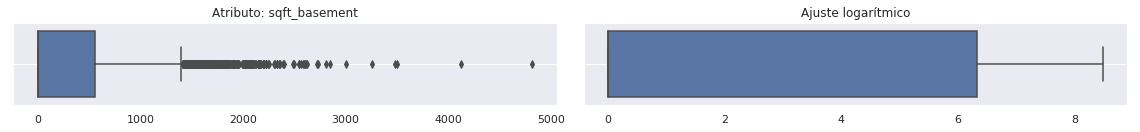

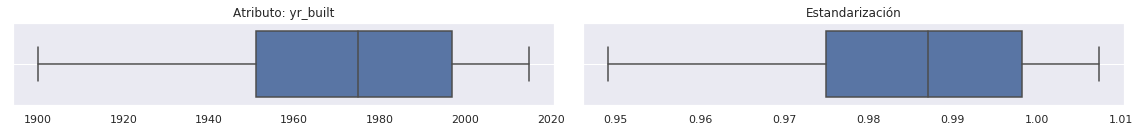

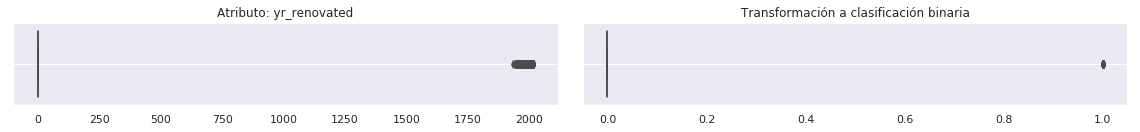

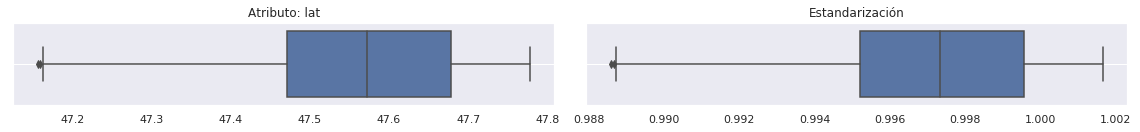

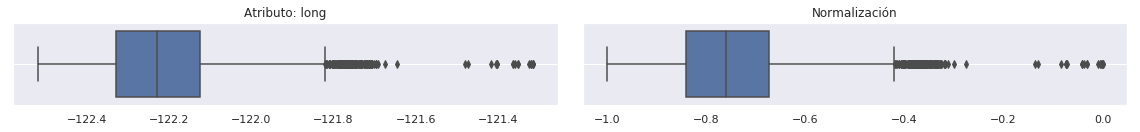

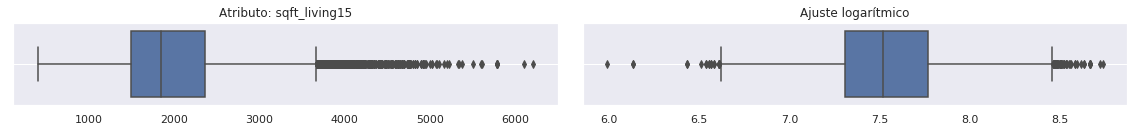

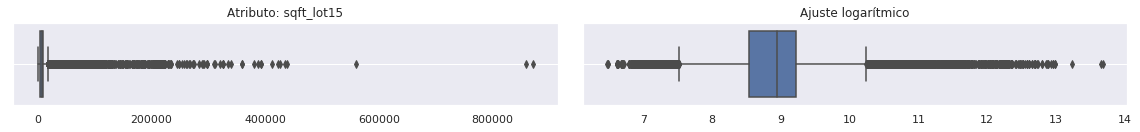

In [44]:
no_norm=['price','sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']
discr=['bedrooms','bathrooms','view','grade']
norm=list(set(data.columns)-set(no_norm)-set(['yr_renovated'])-set(['waterfront'])-set(discr)-set(['long']))
for i in data.columns:
    plt.subplot(1,2,1)
    plt.title('Atributo: '+i)
    sns.boxplot(list(data[i]))
    plt.tight_layout()
    plt.grid()
    plt.subplot(1,2,2)
    if i in no_norm:
        plt.title('Ajuste logarítmico')  
        sns.boxplot(list(np.log(data[i]+1)))
    if i in norm:
        plt.title('Estandarización')
        sns.boxplot(list((data[i]-np.std(data[i]))/np.mean(data[i])))
    if i=='yr_renovated':
        plt.title('Transformación a clasificación binaria')
        sns.boxplot(list((data['yr_renovated']>1)*1))
    if i=='waterfront':
        plt.title('Ningún escalamiento')
        sns.boxplot(list((data[i])))
    if i=='long':
        plt.title('Normalización')
        sns.boxplot(list((data[i]-np.max(data[i]))/(np.max(data[i])-np.min(data[i]))))
    if i in discr:
        plt.title('División por su máximo')
        sns.boxplot(list((data[i]/np.max(data[i]))))
    plt.tight_layout()
    plt.grid()
    plt.show()

*Comentario: Al realizar los gráficos se añadió el caso especial 'long', el cual se comportó de mejor manera al aplicar una normalización min-max*

Se procede a hacer efectivas las transformaciones de escalamiento

In [45]:
data_norm=data.copy()
for i in data.columns:
    if i in no_norm:
        data_norm[i]=np.log(data[i]+1)
    if i in norm:
        data_norm[i]=(data[i]-np.std(data[i]))/np.mean(data[i])
    if i=='yr_renovated':
        data_norm[i]=(data['yr_renovated']>1)*1
    if i in discr:
        data_norm[i]=data[i]/np.max(data[i])
    if i=='long':
        data_norm[i]=(data[i]-np.max(data[i]))/(np.max(data[i])-np.min(data[i]))

Se verifica que al realizar las transformaciones no se hayan modificado las correlaciones existentes de mayor forma, para esto se calcula el promedio de la diferencia entre las matrices.

In [46]:
dif=data_norm.corr()-data.corr()
np.mean(dif.values)

0.0037453816733242643

*Comentario: Se resalta el hecho de que la diferencia en la matriz de correlación ha aumentado levemente*

Se procede a realizar un mapa de calor sobre las correlaciones entre todas las características disponibles

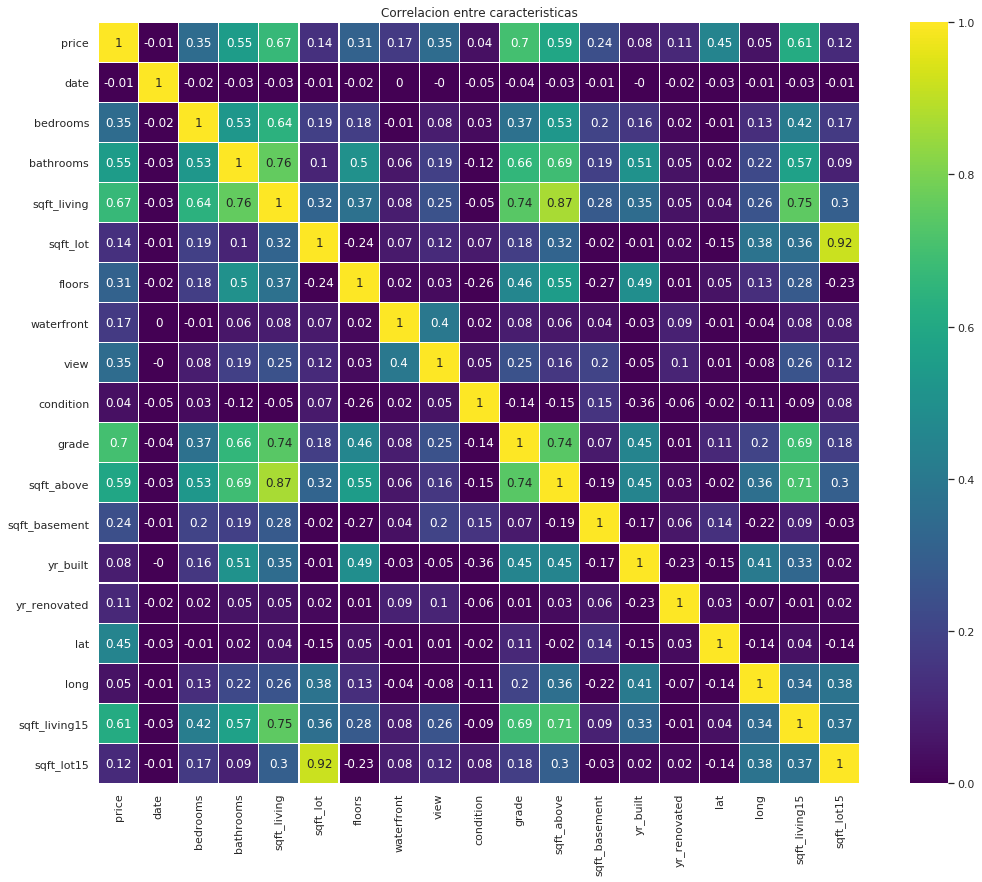

In [47]:
data_norm=data_norm.reindex(columns=['price','date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above','sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long','sqft_living15', 'sqft_lot15'])
plt.figure(figsize=(18,14))
sns.heatmap(np.around(data_norm.corr(),decimals=2), vmax=1,vmin=0, linewidths=0.1,
            square=True,annot=True,cmap='viridis',linecolor="white")
sns.set(font_scale=1)
plt.title('Correlacion entre caracteristicas');
plt.show()

In [48]:
row=np.asarray(np.around(data_norm.corr(),decimals=2))[:,0]
print('Ranking de mayor a menor valor de correlación respecto al precio:\n')
for i in range(18):
    print(data_norm.columns[np.argmax(row)],': ',row[np.argmax(row)])
    row[np.argmax(row)]=0

Ranking de mayor a menor valor de correlación respecto al precio:

price :  1.0
grade :  0.7
sqft_living :  0.67
sqft_living15 :  0.61
sqft_above :  0.59
bathrooms :  0.55
lat :  0.45
bedrooms :  0.35
view :  0.35
floors :  0.31
sqft_basement :  0.24
waterfront :  0.17
sqft_lot :  0.14
sqft_lot15 :  0.12
yr_renovated :  0.11
yr_built :  0.08
long :  0.05
condition :  0.04


*Comentarios: Para realizar un buen ajuste lineal se requiere que exista una buena correlación entre el dato a predecir y las características a utilizar, a la vez se requiere que la correlación entre las características a ocupar sea de bajo valor. Se vuelve a realizar el mapa de calor eliminando las características con menos de un 10% de correlación, claramente sin tomar en cuenta el precio*

In [49]:
data_norm_pick=data_norm.copy()
data_norm_pick=data_norm_pick.drop(columns=['yr_built','long','condition'])

*Nota: Se reordena el nuevo dataframe como paso intemedio*

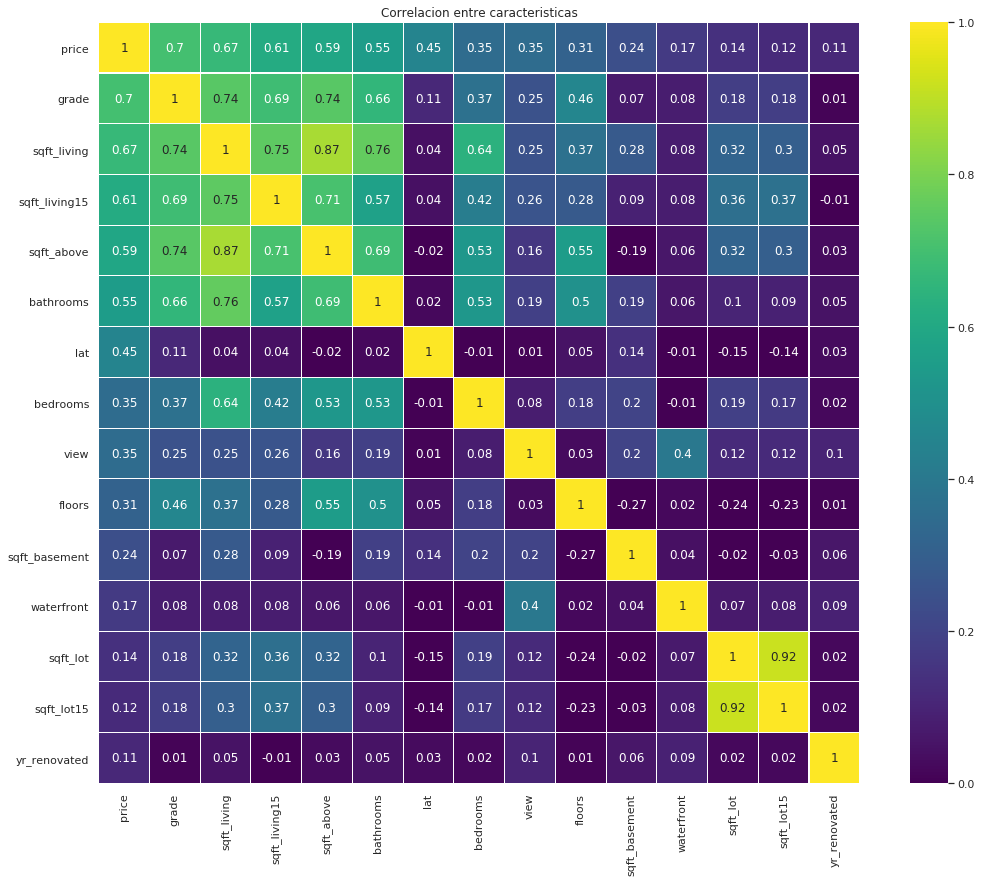

In [50]:
data_norm_pick=data_norm_pick.reindex(columns=['price','grade','sqft_living','sqft_living15','sqft_above','bathrooms','lat','bedrooms','view','floors','sqft_basement','waterfront','sqft_lot','sqft_lot15','yr_renovated'])
plt.figure(figsize=(18,14))
sns.heatmap(np.around(data_norm_pick.corr(),decimals=2), vmax=1,vmin=0, linewidths=0.1,
            square=True,annot=True,cmap='viridis',linecolor="white")
sns.set(font_scale=1)
plt.title('Correlacion entre caracteristicas');
plt.show()

*Comentario: Resultan muy altas correlaciones entre grade y (sqft_living, sqft_living15,sqft_above,bathroom), esto posiblemente debido a que el nivel de 'grade' que entrega King County toma en cuenta ya estas características, esto puede recaer en que no necesariamente los atributos con mayor correlación respecto a price sean las más óptimos a agregar*

Por último se realizan scatter plots respecto a la variable precio para los 6 atributos con mayor correlación respecto al precio, adicionalmente sns.pairplot ofrece la posibilidad de realizar un regresión lineal entre el par de variables. En la diagonal es posible visualizar un ajuste kde mostrando la distribución de la variable en cuestión.

/home/wil/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


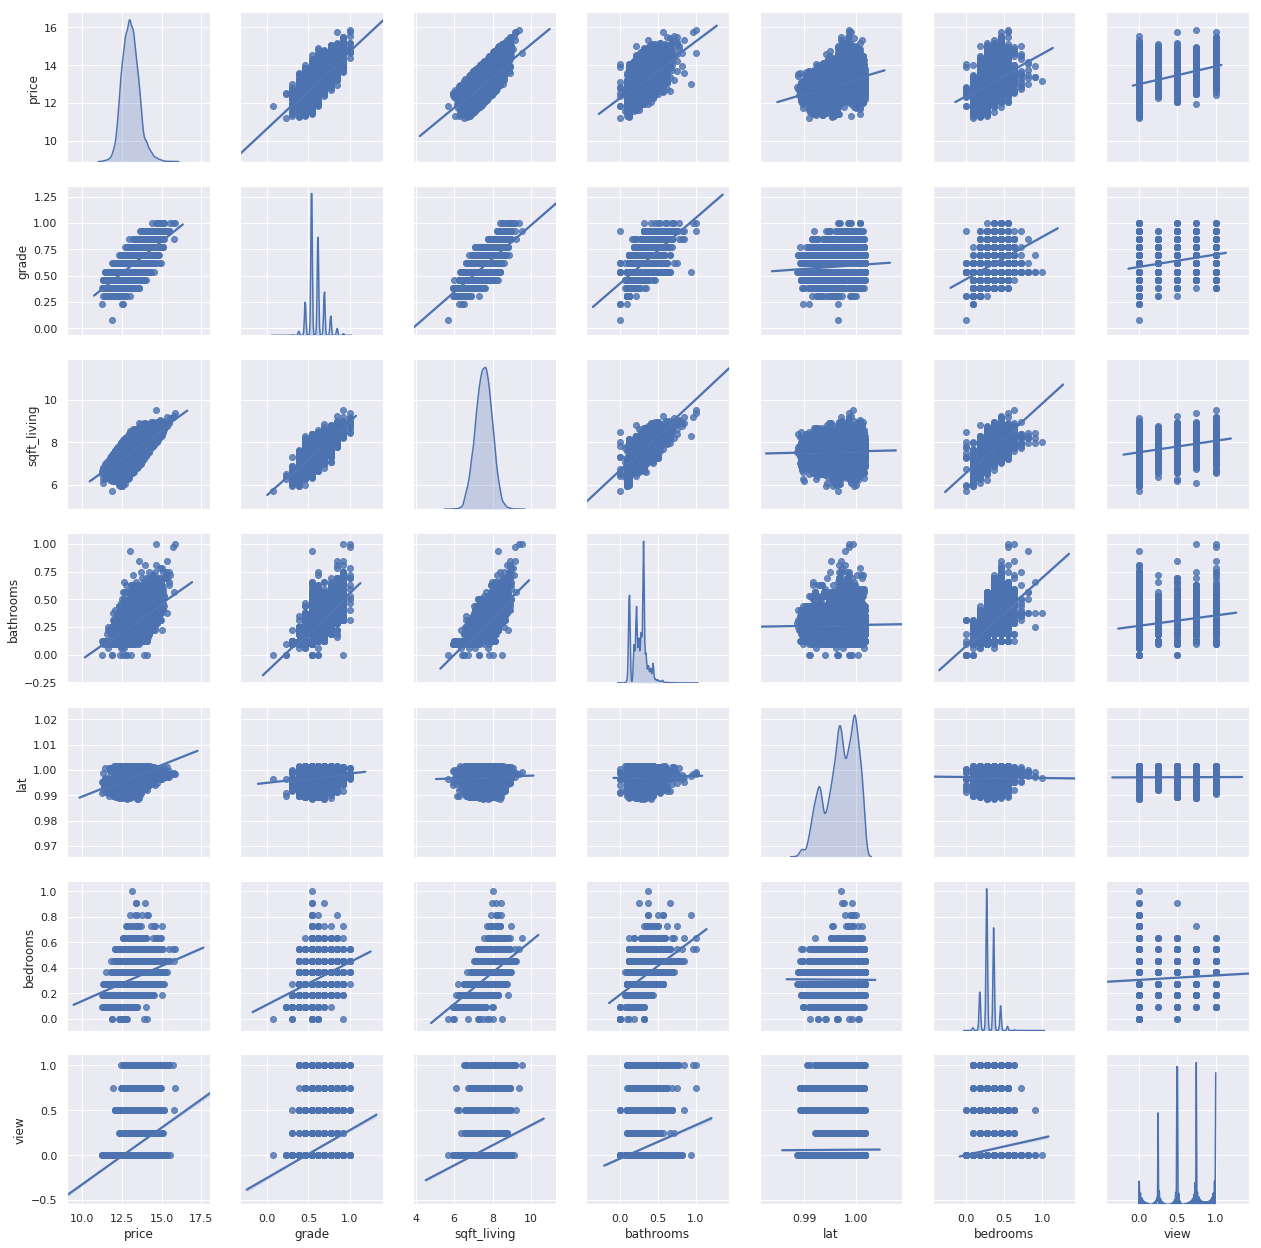

In [51]:
sns.pairplot(data_norm[['price','grade','sqft_living','bathrooms','lat','bedrooms','view']],kind='reg',diag_kind='kde')
plt.show()

*Comentario: Como es de esperar entre características que poseen alta correlación se logra un ajuste lineal más coherente con la data, como por ejemplo entre price y grade, lo cual resulta beneficioso, y entre sqft_living y grade, lo cual resulta en posible redundancia de información teóricamente, se aprecia que las regresiones lineales entre precio y características no son del todo exitosas, varían de izquierda a derecha (primera fila) de acuerdo a la correlación obtenida. A la vez se aprecia en la diagonal nuevamente las distribuciones con mayor detalle (y con ajuste kde), lo cual ayuda a confirmar lo exitoso de los distintos escalamientos realizados.*

#### 2.c Selección de Atributos _by hand_
En esta parte comensaremos entrenando un modelo sin ningun atributo y luego iremos agregando 1 a 1 el atributo que más mejora los resultados de la predicción. En cada paso validaremos qué atributo es el mejor utilizando 5-_fold_.
Para el modelo sin ningún atributo utilizaremos una predicción constante igual al promedio de los datos de entrenamiento. Luego, en cada iteración, evaluaremos cada uno de los atributos restantes, viendo cual reduce más el error. El error que utilizaremos para esta pregunta sera el MSE o _Mean Square Error_. Luego de elegido un atributo, lo agregamos a la lista de atributos a utilizar y continuamos iterando hasta agotar los atributos restantes.

A modo de realizar el entrenamiento se torna indispensable separar la data en entrenamiento/validación y test, esto se realiza a continuación con la data normalizada.

In [52]:
xy_train, xy_test = train_test_split(data_norm, test_size= 0.1, shuffle=True)
print('Porcentaje de cantidad de datos respecto al dataset (train, test): ',round(100*xy_train.shape[0]/data_norm.shape[0]),'%, ',round(100*xy_test.shape[0]/data_norm.shape[0]),'%')

Porcentaje de cantidad de datos respecto al dataset (train, test):  90 %,  10 %


*Comentario: Cabe resaltar que el uso se separa tan solo el conjunto de test dado que la separación entre el conjunto de entrenamiento y validación será realizado por medio de método 5-Fold.*

Se realiza el entrenamiento por medio de la medición de los errores MSE de entrenamiento, validación y test.

In [53]:
from statistics import mean
from sklearn.metrics import mean_squared_error
restantes = list(xy_train.columns)
restantes.remove('price')
actuales = []
folds = KFold(5)
error=list()
error_prom=list()
save_error=list()
valerror=list()
valerror_prom=list()
save_valerror=list()
tsterror=list()
tsterror_prom=list()
save_tsterror=list()
k=1
while restantes:
    for atributo_candidato in restantes:
        for train_index, val_index in folds.split(xy_train):
            xy_tr=xy_train.iloc[train_index]
            xy_val=xy_train.iloc[val_index]
            if k==1:
                error_actual = ((xy_tr[['price']].values-xy_tr[['price']].values.mean())**2).mean()
                error_actual_val = ((xy_val[['price']].values-xy_tr[['price']].values.mean())**2).mean()
                error_actual_tst = ((xy_test[['price']].values-xy_tr[['price']].values.mean())**2).mean()
                save_error.append(error_actual)
                save_valerror.append(error_actual_val)
                save_tsterror.append(error_actual_tst)
            k+=1
            reg = LinearRegression()
            reg.fit(np.asarray(xy_tr[actuales+[atributo_candidato]]),np.asarray(xy_tr[['price']]))
            error.append(mean_squared_error(xy_tr[['price']], reg.predict(xy_tr[actuales+[atributo_candidato]])))
            valerror.append(mean_squared_error(xy_val[['price']], reg.predict(xy_val[actuales+[atributo_candidato]])))
            tsterror.append(mean_squared_error(xy_test[['price']], reg.predict(xy_test[actuales+[atributo_candidato]])))
        error_prom.append(mean(error))
        valerror_prom.append(mean(valerror))
        tsterror_prom.append(mean(tsterror))
        error=list()
        valerror=list()
        tsterror=list()
    if np.min(valerror_prom)<error_actual_val:
        actuales.append(restantes[np.argmin(valerror_prom)])
        restantes.remove(restantes[np.argmin(valerror_prom)])
        save_error.append(error_prom[np.argmin(valerror_prom)])
        save_valerror.append(valerror_prom[np.argmin(valerror_prom)])
        save_tsterror.append(tsterror_prom[np.argmin(valerror_prom)])
        error_actual_val=valerror_prom[np.argmin(valerror_prom)]
    else:
        break
    error_prom=list()
    valerror_prom=list()
    tsterror_prom=list()

El orden en que se fueron añadiendo características es el siguiente

In [54]:
print(actuales)

['grade', 'lat', 'sqft_living', 'yr_built', 'view', 'sqft_living15', 'bathrooms', 'waterfront', 'condition', 'floors', 'date', 'bedrooms', 'sqft_lot15', 'yr_renovated', 'sqft_lot', 'sqft_above', 'sqft_basement']


*Comentario: De acuerdo a la teoria, pese a que sqft_living posee la segunda mayor correlación con grade esta no es añadida inmediatamente después de esta, sino que se añade lat, la cual tiene menor correlación con price pero a la vez menor correlación con grade de lo que tiene la variable sqft_living. Sin embargo, la variable sqft_living es añadida luego de lat, esto quiere decir que pese a que esta característica ya contiene información entregada incluida en grade aún así tiene mayor información que su sucesor, yr_built, esta última posee una correlación ínfima con respecto al target, sin embargo es añadida, desafiando en parte la teoría, ya que esta variable en particular mantiene una alta correlación con grade. Por último resaltar que no se han añadido todas las variables al modelo, es decir, cada atributo a aportado información a la regresión lineal y a ayudado a su mejora menos el atributo 'long'*

In [55]:
restantes

['long']

#### 2.d Validar

Se procede a graficar los errores de entrenamiento, validación y test a medida que se han ido añadiendo características

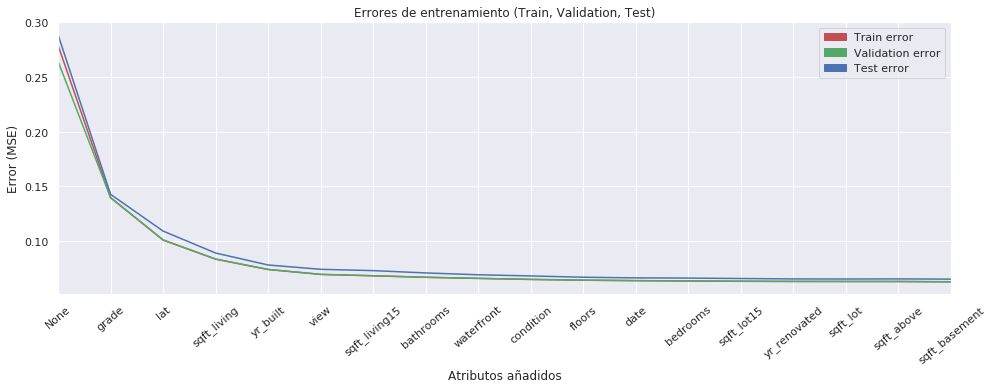

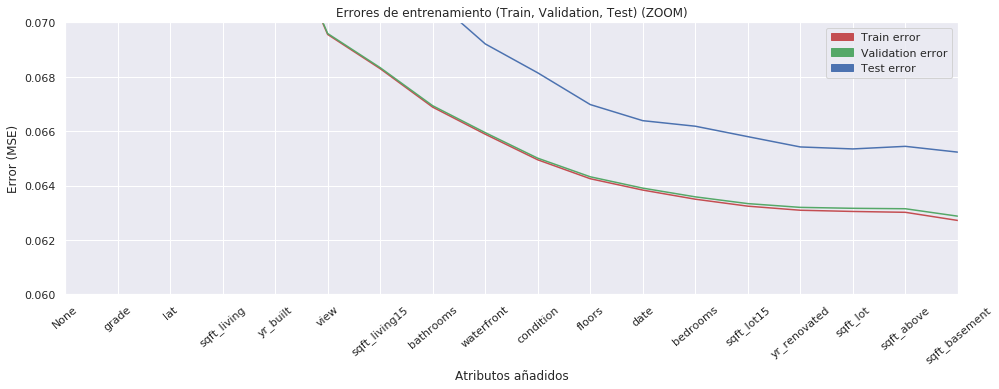

In [56]:
plt.rcParams['figure.figsize']=[16,5]
plt.title('Errores de entrenamiento (Train, Validation, Test)')
tt=18
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
r = mpatches.Patch(color='r', label='Train error')
g = mpatches.Patch(color='g', label='Validation error')
b = mpatches.Patch(color='b', label='Test error')
plt.legend(handles=[r,g,b])
plt.plot(np.linspace(1,tt,tt),save_error,'r')
plt.plot(np.linspace(1,tt,tt),save_valerror,'g')
plt.plot(np.linspace(1,tt,tt),save_tsterror,'b')
plt.xticks(np.linspace(1,tt,tt),['None']+actuales,rotation=40)
plt.xlim([1,tt])
plt.xlabel('Atributos añadidos')
plt.ylabel('Error (MSE)')
plt.show()
plt.title('Errores de entrenamiento (Train, Validation, Test) (ZOOM)')
plt.legend(handles=[r,g,b])
plt.plot(np.linspace(1,tt,tt),save_error,'r')
plt.plot(np.linspace(1,tt,tt),save_valerror,'g')
plt.plot(np.linspace(1,tt,tt),save_tsterror,'b')
plt.xticks(np.linspace(1,tt,tt),['None']+actuales,rotation=40)
plt.ylim([0.06,0.07])
plt.xlim([1,tt])
plt.xlabel('Atributos añadidos')
plt.ylabel('Error (MSE)')
plt.show()

*Comentario: Se aprecia que los errores de entrenamiento y validación siguen tendencias semejantes a medida que se van añadiendo características, a la vez, como se esperaba, cada atributo añadido ayuda a mejorar el error de entrenamiento (el cual se utilizó para decidir cuál característica entraba a la regresión). La naturaleza del comportamiento de las curvas de entrenamiento y validación indican que no se provoca sobre ajuste, esto ocurriría si es que el error de validación aumentase mientras el de entrenamiento estuiviese disminuyendo. El hecho de que el error de test se inferior a ambos indica que el conjunto de test seguramente se encuentra aún mejor representado por las característica que se han ido añadiendo, en diferentes divisiones del dataset en train, validation y test se identificaron distintos comportamientos para este error de test.*

#### 2.e Mutual information
Se calcula la Información Mutual para los datos.

In [57]:
from sklearn.feature_selection import mutual_info_regression
atributosx = list(xy_train.columns)
atributosx.remove('price')
mi=mutual_info_regression(xy_train[atributosx], xy_train[['price']])
MI = list(zip(mi,xy_train[atributosx].columns))

/home/wil/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


*Nota: La información mutual entre dos variables aleatorias es un valor no negativo, este mide la dependencia entre variables. Esta es igual a cero si y solo si dos variables aleatorias son independientes, que resulte en valores elevados significa una mayor dependencia.*

*Comentario: La información que entrega MI se asemeja a la interpretación que se le dio a la matriz de correlación en los puntos anteriores, sin embargo es menos rica en información dado que entrega el grado de dependencia entre variables no necesariamente a nivel lineal, lo cual para fines de realizar una regresión lineal no aporta información de qué variables se espera que puedan aportar de mejor modo. Ante el hecho de que entregue valores elevados en comparación con la matriz de correlación puede llegar a  ser un indicio que existen mejores alternativas para predecir el target en lugar de una regresión lineal, p.ej red neuronal.*

In [58]:
MI

[(0.001306431387940954, 'date'),
 (0.07509992831766343, 'bedrooms'),
 (0.20694585036087654, 'bathrooms'),
 (0.35061782222713944, 'sqft_living'),
 (0.07315309308786322, 'sqft_lot'),
 (0.07005338980892617, 'floors'),
 (0.010360674237792411, 'waterfront'),
 (0.055948591797969405, 'view'),
 (0.007035641331668341, 'condition'),
 (0.3538484384554996, 'grade'),
 (0.263130463771617, 'sqft_above'),
 (0.06638990861993532, 'sqft_basement'),
 (0.07510024523361025, 'yr_built'),
 (0.0028595932785484557, 'yr_renovated'),
 (0.33169147955063405, 'lat'),
 (0.1112031888158782, 'long'),
 (0.2713626901713768, 'sqft_living15'),
 (0.0870319120250107, 'sqft_lot15')]

Se procede a ordenar las características según su dependencia respecto al target

In [59]:
row=np.around(mi,decimals=2)
print('Ranking de mayor a menor valor de dependencia respecto al precio:\n')
for i in range(17):
    print(xy_train.columns[np.argmax(row)],': ',row[np.argmax(row)])
    row[np.argmax(row)]=0

Ranking de mayor a menor valor de dependencia respecto al precio:

bathrooms :  0.35
condition :  0.35
yr_renovated :  0.33
long :  0.27
grade :  0.26
bedrooms :  0.21
lat :  0.11
sqft_living15 :  0.09
date :  0.08
sqft_basement :  0.08
sqft_living :  0.07
sqft_lot :  0.07
sqft_above :  0.07
waterfront :  0.06
floors :  0.01
view :  0.01
price :  0.0


*Comentario: Se aprecia que el resultado obtenido dista de lo obtenido en la matriz de correlación, debido a que MI analiza dependencias más allá de la correlación lineal. A la vez resulta interesante ver que todas las variables poseen información mutua respecto al precio, por lo cual ninguna se está comportando como ruido.*

#### 2.f Más variables
Se repite lo realizado en la pregunta 2.c (incluyendo gráficos) pero agregando la variable categorica `zipcode` utilizando nuevamente `pd.get_dummies`.

In [60]:
data = pd.read_csv("housesalesprediction/kc_house_data.csv")
data=data.drop(np.argmax(data['bedrooms']))
dum=pd.get_dummies(data.zipcode)
dum[list(data_norm.columns)]=data_norm[list(data_norm.columns)]

/home/wil/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


Para realizar el ajuste lineal es necesario dividir el conjunto en entrenamiento/validación y test

In [61]:
xy_train, xy_test = train_test_split(dum, test_size= 0.1)
print('Porcentaje de cantidad de datos respecto al dataset (train, test): ',round(100*xy_train.shape[0]/data_norm.shape[0]),'%, ',round(100*xy_test.shape[0]/data_norm.shape[0]),'%')

Porcentaje de cantidad de datos respecto al dataset (train, test):  90 %,  10 %


Se vuelve a utilizar el mismo procedimiento de 5-Fold utilizado en el item 2.c

In [62]:
from statistics import mean
from sklearn.metrics import mean_squared_error
restantes = list(xy_train.columns)
restantes.remove('price')
actuales = []
folds = KFold(5)
error=list()
error_prom=list()
save_error=list()
valerror=list()
valerror_prom=list()
save_valerror=list()
tsterror=list()
tsterror_prom=list()
save_tsterror=list()
k=1
while restantes:
    for atributo_candidato in restantes:
        for train_index, val_index in folds.split(xy_train):
            xy_tr=xy_train.iloc[train_index]
            xy_val=xy_train.iloc[val_index]
            if k==1:
                error_actual = ((xy_tr[['price']].values-xy_tr[['price']].values.mean())**2).mean()
                error_actual_val = ((xy_val[['price']].values-xy_tr[['price']].values.mean())**2).mean()
                error_actual_tst = ((xy_test[['price']].values-xy_tr[['price']].values.mean())**2).mean()
                save_error.append(error_actual)
                save_valerror.append(error_actual_val)
                save_tsterror.append(error_actual_tst)
            k+=1
            reg = LinearRegression()
            reg.fit(np.asarray(xy_tr[actuales+[atributo_candidato]]),np.asarray(xy_tr[['price']]))
            error.append(mean_squared_error(xy_tr[['price']], reg.predict(xy_tr[actuales+[atributo_candidato]])))
            valerror.append(mean_squared_error(xy_val[['price']], reg.predict(xy_val[actuales+[atributo_candidato]])))
            tsterror.append(mean_squared_error(xy_test[['price']], reg.predict(xy_test[actuales+[atributo_candidato]])))
        error_prom.append(mean(error))
        valerror_prom.append(mean(valerror))
        tsterror_prom.append(mean(tsterror))
        error=list()
        valerror=list()
        tsterror=list()
    if np.min(valerror_prom)<error_actual_val:
        actuales.append(restantes[np.argmin(valerror_prom)])
        restantes.remove(restantes[np.argmin(valerror_prom)])
        save_error.append(error_prom[np.argmin(valerror_prom)])
        save_valerror.append(valerror_prom[np.argmin(valerror_prom)])
        save_tsterror.append(tsterror_prom[np.argmin(valerror_prom)])
        error_actual_val=valerror_prom[np.argmin(valerror_prom)]
    else:
        break
    error_prom=list()
    valerror_prom=list()
    tsterror_prom=list()

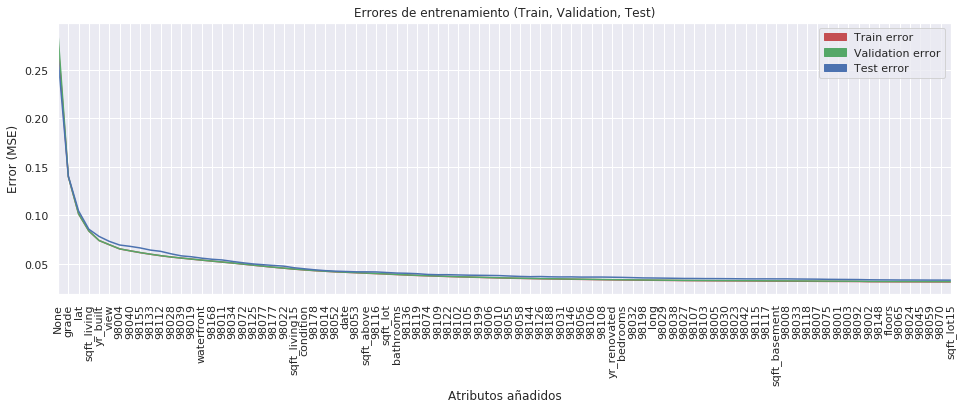

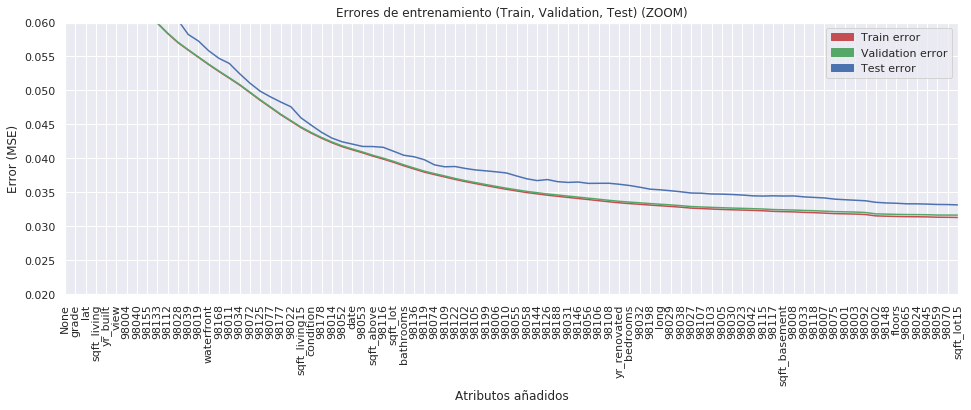

In [64]:
plt.rcParams['figure.figsize']=[16,5]
plt.title('Errores de entrenamiento (Train, Validation, Test)')
tt=88
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
r = mpatches.Patch(color='r', label='Train error')
g = mpatches.Patch(color='g', label='Validation error')
b = mpatches.Patch(color='b', label='Test error')
plt.legend(handles=[r,g,b])
plt.plot(np.linspace(1,tt,tt),save_error,'r')
plt.plot(np.linspace(1,tt,tt),save_valerror,'g')
plt.plot(np.linspace(1,tt,tt),save_tsterror,'b')
plt.xticks(np.linspace(1,tt,tt),['None']+actuales,rotation=90)
plt.xlim([1,tt])
plt.xlabel('Atributos añadidos')
plt.ylabel('Error (MSE)')
plt.show()
plt.title('Errores de entrenamiento (Train, Validation, Test) (ZOOM)')
plt.legend(handles=[r,g,b])
plt.plot(np.linspace(1,tt,tt),save_error,'r')
plt.plot(np.linspace(1,tt,tt),save_valerror,'g')
plt.plot(np.linspace(1,tt,tt),save_tsterror,'b')
plt.xticks(np.linspace(1,tt,tt),['None']+actuales,rotation=90)
plt.ylim([0.02,0.06])
plt.xlim([1,tt])
plt.xlabel('Atributos añadidos')
plt.ylabel('Error (MSE)')
plt.show()

*Comentario: Se aprecia que a medida que se añaden características el error sigue disminuyendo progresivamente, siendo la información del código postal muy útil para la regresión lineal, bajando desde aproximadamente 0.06 hasta 0.03. No se produce sobreajuste y ahora el error de test se encuentra sobre la curva de error de entrenamiento y validación, lo cual suele ser lo común, sin embargo si esto no se cumpliese no debiese ser razón de preocupación mayor aunque es un tanto anómalo que esto ocurra se debe principalmente a la división del dataset en los tres conjuntos: entrenamiento, validación y test, quedando el conjunto de test comportándose de mejor modo con la regresión que los demás conjuntos, mientras el dataset se encuentre desordenado no debiese ser problema.*

Tan solo dos códigos postales quedaron fuera de la regresión lineal

In [65]:
restantes

[98166]

<a id="tercero"></a>
## 3. Clasificación. 

#### 3.a Carga de datos
En ambos archivos CSV los datos vienen sin una fila que identifique a las columnas, por lo que es necesario dar un nombre a cada columna al almacenarlo en un dataframe.

Todas las magnitudes de las distintas características se mueven entre el 0 y 1, por lo que no sería necesario aplicar estandarización a estas, ya que todas estan en una escala comparable. La estandarización cambiaría los datos para tener media 0 y desviación estandar 1, pero los features ya estan lo suficientemente cercanos a esto como para que sus features tengan un peso similar dentro del modelo.

El dataset estaba ordenado primero por pacientes normales seguido de los anormales, lo que hubiese hecho que en el split sin shuffling se obtuvieran conjuntos con datos correspondientes a solo uno de los targets (o mayoritariamente uno de los targets). Al menos uno de los tres subsests de datos: train, test, validation hubiese tenido datos pertenecientes a solo una de las clases.

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [67]:
col_names= list(range(188))
data_normal = pd.read_csv("heartbeat/ptbdb_normal.csv",names=col_names)
data_normal['target']=0

data_abnormal = pd.read_csv("heartbeat/ptbdb_abnormal.csv",names=col_names)
data_abnormal['target']=1

In [68]:
print('Tamaño dataset sin condición cardiaca: ',data_normal.shape,'\nTamaño dataset con condición cardiaca: ',data_abnormal.shape)

Tamaño dataset sin condición cardiaca:  (4046, 189) 
Tamaño dataset con condición cardiaca:  (10506, 189)


In [69]:
data_abnormal=data_abnormal[:4046]
print('Tamaño dataset sin condición cardiaca: ',data_normal.shape,'\nTamaño dataset con condición cardiaca: ',data_abnormal.shape)

Tamaño dataset sin condición cardiaca:  (4046, 189) 
Tamaño dataset con condición cardiaca:  (4046, 189)


In [70]:
data = data_normal.append(data_abnormal)

In [71]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,179,180,181,182,183,184,185,186,187,target
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [72]:
means = []
maxs = []
mins = []
stds = []
meds = []

for i in range(188):
    means.append(np.mean(data[i]))
    maxs.append(np.max(data[i]))
    mins.append(np.min(data[i]))
    stds.append(np.std(data[i]))
    meds.append(np.median(data[i]))

print ("min of mins:", np.min(mins))
print ("max of maxs:", np.max(maxs))
print ("mean of means:", np.mean(means))
print ("median of medians:", np.median(meds))
print ("mean of stds:", np.mean(stds))
print ("median of stds:", np.median(stds))

min of mins: 0.0
max of maxs: 1.0
mean of means: 0.17092432162396867
median of medians: 0.14692377671599388
mean of stds: 0.1528700087583105
median of stds: 0.16524722391684443


In [73]:
count = 0
indexes = []
i=0
for std in stds:
    if std <= 1e-2:
        count += 1
        indexes.append(i)
    i+=1
        
print(indexes)

[184, 185, 186]


In [74]:
count = 0
for m in maxs:
    if m > 1:
        count += 1
        
print(count)

0


In [75]:
count = 0
for m in mins:
    if m < 0:
        count += 1
        
print(count)

0


#### 3.b Correlación

In [76]:
data = data.drop(columns=[184,185,186,187])

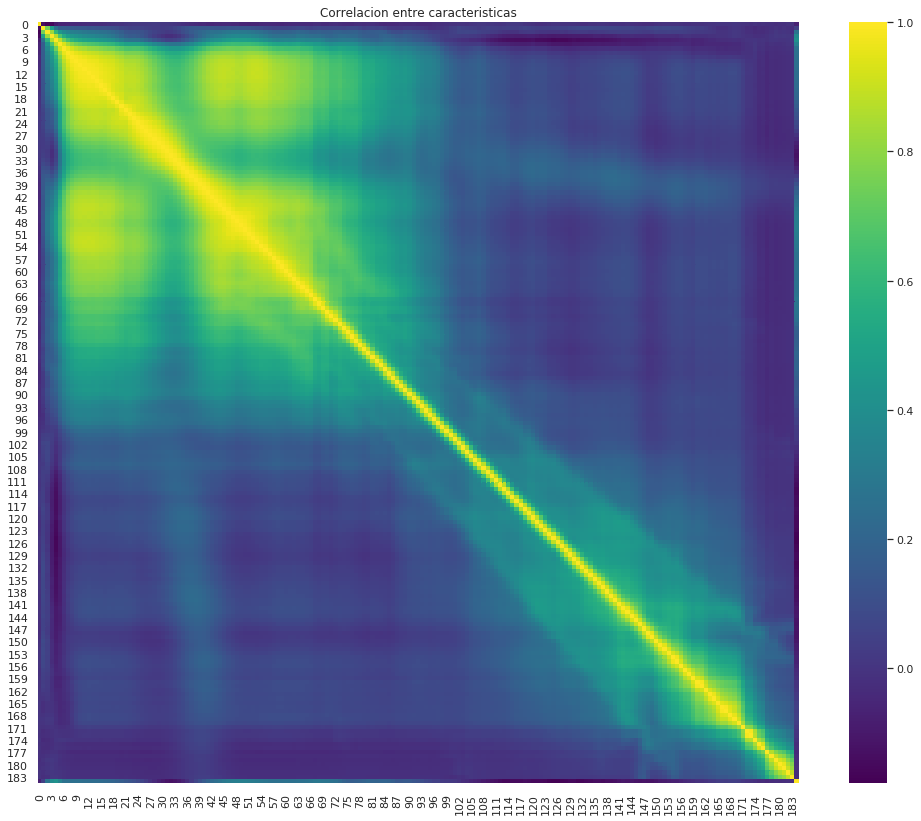

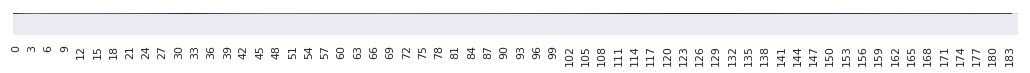

In [77]:
plt.figure(figsize=(18,14))
sns.heatmap(data.corr(), vmax=1,
            square=True,annot=False,cmap="viridis",cbar=True)
sns.set(font_scale=1)
plt.title('Correlacion entre caracteristicas')
plt.show()

line = np.asarray(data.corr()["target"]).reshape(1,185)


plt.figure(figsize=(18,14))
sns.heatmap(line, vmax=1,
            square=True,annot=False,cmap="viridis",cbar=False)
sns.set(font_scale=1)
plt.ylim([5,0.9])
plt.show()


Se observa que entre la mayoría de los features no hay una correlación significativa (predomina un color morado/celesten el heatmap).

Sí se observan features altamente correlacionados entre los que poseen un tag menor (en la sub-matriz de los primeros 65 features) donde predomina un color amarillo con algo de celeste en el heatmap.

Se observa un color celeste en posiciones cercanas a la diagonal de la matriz, lo que indicaría que habría una correlación de aprox 0.4 a 0.5 en estas.

Finalmente en la línea de abajo podemos ver las correlaciones de los features con el target.
Puede distinguirse que la mayoría de los features no poseen una correlación importante (color morado), pero también existen algunos con correlación de aprox 0.5 (color celeste).

#### 3.c Regresión Logistica

In [78]:
xy_train, temp = train_test_split(data, test_size= 0.3,shuffle=True)
xy_val, xy_test = train_test_split(temp, test_size= 0.5,shuffle=True)
print('Porcentaje de cantidad de datos respecto al dataset (train, validation, test): ',round(100*xy_train.shape[0]/data.shape[0]),'%, ',round(100*xy_val.shape[0]/data.shape[0]),'%, ',round(100*xy_test.shape[0]/data.shape[0]),'%')
y_train,y_val,y_test=xy_train['target'],xy_val['target'],xy_test['target']
x_train=np.asarray(xy_train.drop(columns='target'))
x_val=np.asarray(xy_val.drop(columns='target'))
x_test=np.asarray(xy_test.drop(columns='target'))

Porcentaje de cantidad de datos respecto al dataset (train, validation, test):  70 %,  15 %,  15 %


In [79]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train,y_train)
reg.score(x_val,y_val)

/home/wil/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7981878088962109

El score de nuestro modelo corresponde al promedio del accuracy sobre el dataset que se usó para probar el modelo.

Un score de aproximadamente 0.8 es un valor bueno, pero probablemente mejorable.

In [80]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, reg.predict(x_test))

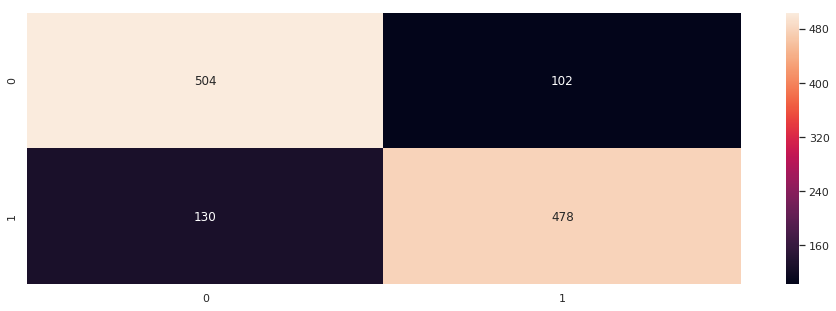

In [81]:
sns.heatmap(confusion_matrix,annot=True,fmt='d')
plt.show()

La matriz de confusión nos permite ver la cantidad de aciertos y errores que tuvo nuestro modelo en las clasificaciones realizadas. La diagonal principal nos muestra los aciertos, en nuestro caso podemos ver que en la mayoría de los casos el modelo pudo clasificar de manera correcta a los datos que se buscaba predecir.

#### 3.d Otra métrica. 

In [82]:
np.mean((np.max(reg.predict_proba(x_val),axis=1)*(reg.predict(x_val)-y_val))**2)

0.09356688181193851

In [83]:
np.max(reg.predict_proba(x_val))

0.9999932737072381

La métrica compara valores predecidos y los compara con el valor real, obteniendo un valor de -1 o 1 para predicciones incorrectas y 0 para predicciones correctas.
Luego se multiplica estos valores por la máxima probabilidad de que una de las predicciones hechas pertenezca a la clase de las frecuencias cardíacas anormales.
Finalmente estos valores se elevan al cuadrado y se obtiene la media de estos.

Esto puede entenderse como, para cada predicción mal hecha, mientras mayor confianza tenga el modelo en sus predicciones, se penalizará por un valor mayor.
Por otra parte, si la predicción es correcta, no se penaliza.
Cada predicción mal hecha aumenta el valor de la métrica, y cada predición bien hecha disminuirá el valor de esta métrica.

El valor óptimo de la métrica es el valor 0, ya que indica que todas nuestras predicciones fueron correctas. corresponde con el mínimo valor posible de la métrica.

Finalmente, un modelo con métrica 0.4 es mejor que uno con métrica 0.5

#### 3.e PCA y LDA
Transforme los datos mediante PCA a 2 dimensiones y grafique un subsampleo de alrededor de 50 - 100 datos con 50% de cada clase. Coloree cada punto correspondiente a la clase a la que pertenece. 

Realice el mismo analisis para LDA, considerando el mismo conjunto de puntos. Cual de ambos métodos le parece más apropiado?

Grafíque el centro de gravedad (promedio en cada cordenada) de cada una de las clases luego de la reducción de dimensionalidad. 

In [84]:
from sklearn.decomposition import PCA
data1=data.sample(frac=1)
target=pd.DataFrame(data=data['target'],columns=['target'])
x=data.drop(columns='target')

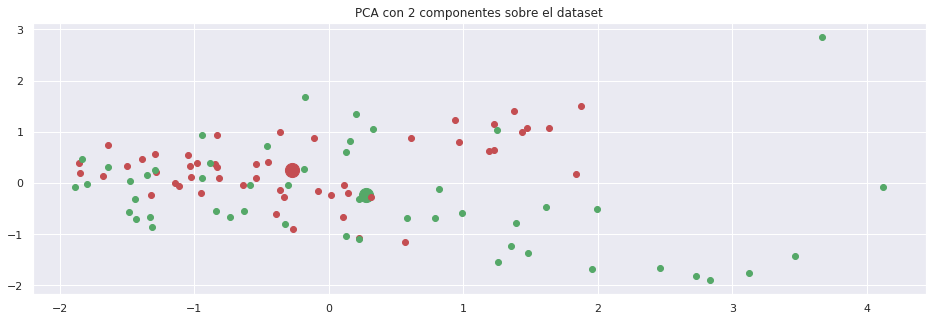

In [85]:
pca = PCA(n_components=2)
principalcomps = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalcomps, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, target.reset_index()],axis=1, ignore_index=True)
finalDf=finalDf.rename(columns={0:'pca1',1:'pca2',3:'target'})
finalDf=finalDf.drop(columns=2)
plt.rcParams['figure.figsize']=[16,5]

class1 = finalDf[finalDf["target"] == 0]
class2 = finalDf[finalDf["target"] == 1]
cx1 = np.mean(class1["pca1"])
cy1 = np.mean(class1["pca2"])
cx2 = np.mean(class2["pca1"])
cy2 = np.mean(class2["pca2"])

plt.scatter(cx1, cy1, c="r", s=200)
plt.scatter(cx2, cy2, c="g", s=200)


plt.title("PCA con 2 componentes sobre el dataset")
for tar,col in [[0,'r'],[1,'g']]:
    ind=finalDf['target']==tar
    plt.scatter(finalDf.loc[ind,'pca1'][:50],finalDf.loc[ind,'pca2'][:50],c=col)

In [86]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
xlda = lda.fit_transform(x,target['target'])
xlda.shape

(8092, 1)

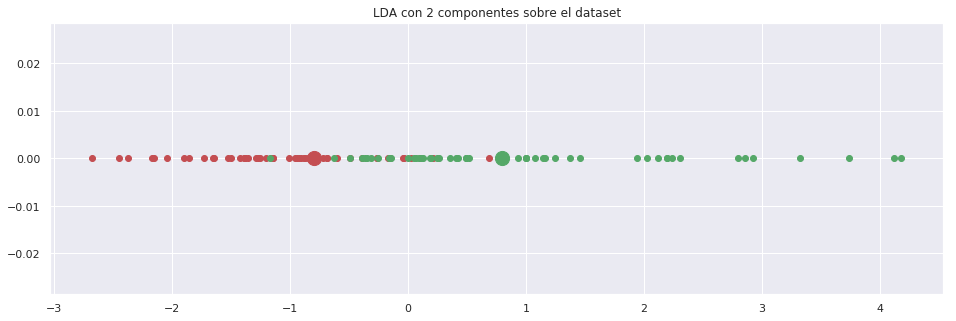

In [87]:
c1 = np.mean(xlda[target['target']==0])
c2 = np.mean(xlda[target['target']==1])

plt.scatter(c1, 0, c="r", s=200)
plt.scatter(c2, 0, c="g", s=200)
plt.title("LDA con 2 componentes sobre el dataset")

for tar,col in [[0,'r'],[1,'g']]:
    plt.scatter(xlda[target['target']==tar][:50],xlda[target['target']==tar][:50]*0,c=col)

Al graficar lo obtenido por tanto PCA como LDA, puede observarse que en ninguna de las dos representaciones se puede ver una clara distinción entre ambas clases.

A simple vista no puede verse un modelo posible para clasificar nuevos datos de buena manera.

Podemos concluir al respecto entonces que la reducción de dimensionalidad de este problema fue una mala idea, ya que no podemos ver un modelo útil luego de haber reducido las dimensiones de nuestro dataset.

Puede ser que el reducir la dimensionalidad sea de utilidad en el caso de reducir solo algunas dimensiones y quitar esencialmente todos los features incluidos en el dataset.

#### 3.f Más reducción de dimensionalidad

In [88]:
from sklearn.metrics import log_loss

train_err = []
val_err = []

dims = list(range(2,121))

for n in dims:
    # PCA sobre n componentes
    pca = PCA(n_components=n)
    principalcomps = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalcomps, columns = list(range(n)))
    finalDf = pd.concat([principalDf, target.reset_index()],axis=1, ignore_index=True)
    finalDf=finalDf.drop(columns=n)
    
    
    # seperacion de datos
    xy_train, temp = train_test_split(finalDf, test_size= 0.3,shuffle=True)# cambio data por concat
    xy_val, xy_test = train_test_split(temp, test_size= 0.5,shuffle=True)
    y_train,y_val,y_test=xy_train[n+1],xy_val[n+1],xy_test[n+1]
    x_train=np.asarray(xy_train.drop(columns=n+1))
    x_val=np.asarray(xy_val.drop(columns=n+1))
    x_test=np.asarray(xy_test.drop(columns=n+1))
    
    # entrenamiento de modelo
    
    reg = LogisticRegression()
    reg.fit(x_train, y_train)
    
    train_error = log_loss(y_train, reg.predict(x_train))
    val_error = log_loss(y_val, reg.predict(x_val))
    
    train_err.append(train_error)
    val_err.append(val_error)


/home/wil/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/wil/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/wil/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/wil/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/wil/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

/home/wil/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/wil/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/wil/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/wil/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/wil/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

/home/wil/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/wil/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/wil/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/wil/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/wil/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

/home/wil/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/wil/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


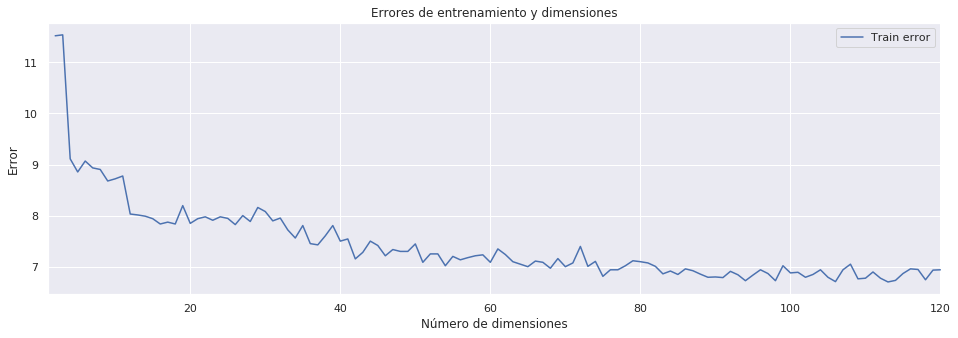

In [89]:
plt.title("Errores de entrenamiento y dimensiones")
plt.xlabel("Número de dimensiones")
plt.ylabel("Error")
plt.plot(dims, train_err,label='Train error')
plt.legend()
plt.xlim([1,120])
plt.show()

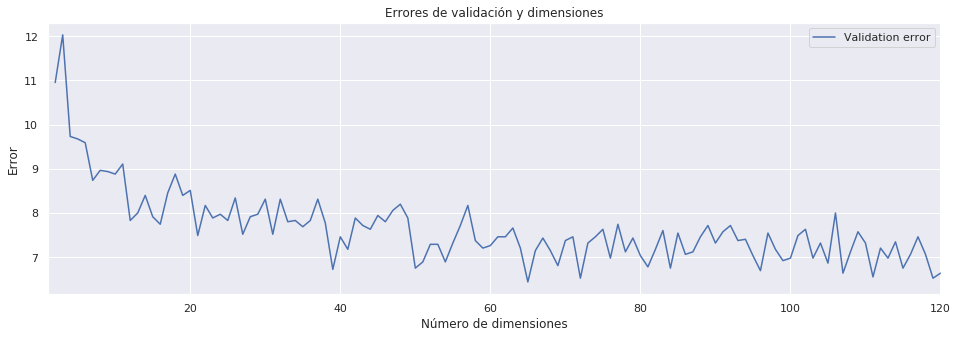

In [90]:
plt.title("Errores de validación y dimensiones")
plt.xlabel("Número de dimensiones")
plt.ylabel("Error")
plt.plot(dims, val_err,label='Validation error')
plt.legend()
plt.xlim([1,120])
plt.show()

In [91]:
reg.score(x_val, y_val)

0.8080724876441515

*Comentario: Se observa en los gráficos de error tanto de entrenamiento como de validación que la tendencia es que el error disminuye considerablemente en un comienzo, pero mientras más componentes se agregan si bien el error pareciera disminuir a la larga, no es de manera notable como en el comienzo. En ambos casos la disminusicón del error no se ve de manera "suave", se observan "spikes" hacia arriba y abajo del error en cada valor siguiente, pero la tendencia a la larga es de disminución del error.*

#### 3.g Naive Bayes
"Entrene" un modelo utilizando Naive Bayes y comparelo con el modelo logístico que entrenó anteriormente.

In [92]:
from sklearn import naive_bayes as sknb
NB = sknb.BernoulliNB()
sol=NB.fit(x_train,y_train)
sol.score(x_val,y_val)

0.757001647446458

*Comentario: Se entrena el modelo y se observa su score, este es menor al obtenido en modelos anteriores, pero sigue siendo relativamente cercano, por lo cual no es del todo adecuado el calificativo Naive en este caso, pues sin mayor esfuerzo se obtiene un error relativamente bueno al comparar con los demás modelos.
Aún así sabemos que el nombre de naive se debe a que el modelo hace la suposición de que cada feature es independiente del anterior, para poder realizar cálculos de manera más fácil. En nuestro caso pudimos observar que esto efectivamente nos entrega peores resultados, aunque siguen siendo aceptables.*